# Entrega 1

## Importando Bibliotecas

In [4]:
# Importando bibliotecas
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer


# Definindo formato e tamanho de gráficos 
sns.set_theme(style="darkgrid", rc={'figure.figsize':(10,6)})

## Obtendo o DataFrame

In [6]:
IMDB_PATH = "datasets/desafio_indicium_imdb.csv"

df = pd.read_csv(IMDB_PATH)

## Entendendo os Dados

In [8]:
df.head(10)

Unnamed: 0                                       Series_Title  \
0           1                                      The Godfather   
1           2                                    The Dark Knight   
2           3                             The Godfather: Part II   
3           4                                       12 Angry Men   
4           5      The Lord of the Rings: The Return of the King   
5           6                                       Pulp Fiction   
6           7                                   Schindler's List   
7           8                                          Inception   
8           9                                         Fight Club   
9          10  The Lord of the Rings: The Fellowship of the Ring   

  Released_Year Certificate  Runtime                      Genre  IMDB_Rating  \
0          1972           A  175 min               Crime, Drama          9.2   
1          2008          UA  152 min       Action, Crime, Drama          9.0   
2          1974           A  202 min               Crime, Drama          9.0   
3          1957           U   96 min               Crime, Drama          9.0   
4          2003           U  201 min   Action, Adventure, Drama          8.9   
5          1994           A  154 min               Crime, Drama          8.9   
6          1993           A  195 min  Biography, Drama, History          8.9   
7          2010          UA  148 min  Action, Adventure, Sci-Fi          8.8   
8          1999           A  139 min                      Drama          8.8   
9          2001           U  178 min   Action, Adventure, Drama          8.8   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker wreaks havo...        84.0   
2  The early life and career of Vito Corleone in ...        90.0   
3  A jury holdout attempts to prevent a miscarria...        96.0   
4  Gandalf and Aragorn lead the World of Men agai...        94.0   
5  The lives of two mob hitmen, a boxer, a gangst...        94.0   
6  In German-occupied Poland during World War II,...        94.0   
7  A thief who steals corporate secrets through t...        74.0   
8  An insomniac office worker and a devil-may-car...        66.0   
9  A meek Hobbit from the Shire and eight compani...        92.0   

               Director              Star1                 Star2  \
0  Francis Ford Coppola      Marlon Brando             Al Pacino   
1     Christopher Nolan     Christian Bale          Heath Ledger   
2  Francis Ford Coppola          Al Pacino        Robert De Niro   
3          Sidney Lumet        Henry Fonda           Lee J. Cobb   
4         Peter Jackson        Elijah Wood       Viggo Mortensen   
5     Quentin Tarantino      John Travolta           Uma Thurman   
6      Steven Spielberg        Liam Neeson         Ralph Fiennes   
7     Christopher Nolan  Leonardo DiCaprio  Joseph Gordon-Levitt   
8         David Fincher          Brad Pitt         Edward Norton   
9         Peter Jackson        Elijah Wood          Ian McKellen   

               Star3             Star4  No_of_Votes        Gross  
0         James Caan      Diane Keaton      1620367  134,966,411  
1      Aaron Eckhart     Michael Caine      2303232  534,858,444  
2      Robert Duvall      Diane Keaton      1129952   57,300,000  
3      Martin Balsam      John Fiedler       689845    4,360,000  
4       Ian McKellen     Orlando Bloom      1642758  377,845,905  
5  Samuel L. Jackson      Bruce Willis      1826188  107,928,762  
6       Ben Kingsley  Caroline Goodall      1213505   96,898,818  
7        Elliot Page      Ken Watanabe      2067042  292,576,195  
8          Meat Loaf      Zach Grenier      1854740   37,030,102  
9      Orlando Bloom         Sean Bean      1661481  315,544,750

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [10]:
df.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

É possível ser feitas as seguintes observações até aqui:
 - É possível remover a coluna "Unnamed: 0" pois representa apenas um index e não representará nenhuma perda a sua ausência;
 - A coluna "Released Year" pode ser convertida para um valor `int` ao invés de `str`; (mais fácil tratar como str)
 - A coluna "Genre", embora bastante informativa, disponibiliza um formato que não auxilia a análise e previsões feitas futuramente. Serão substituídas por valores binários de 0 e 1 por cada gênero utilizando `MultiLabelBinarizer`;
 - A coluna "Runtime" pode ser convertida para um valor `int` ao invés de `str`, caso todos os seus valores sejam procedidos de " min". Será análisado em breve;
 - A coluna "Gross" pode ser convertida para um valor `float` ao invés de `str`. Será necessário também remover as vírgulas.

## Data Cleansing

### Ajustando Types

#### Ajustando coluna "Runtime"

In [15]:
# Analisando coluna "Runetime" se " min" está presente em todas as linhas
df["Runtime"].str.contains(" min").value_counts()

Runtime
True    999
Name: count, dtype: int64

In [16]:
# Removendo das colunas o valor " min" e convertendo para int
df["Runtime"] = df["Runtime"].str.replace(" min", "")
df["Runtime"] = df["Runtime"].astype(int)

#### Ajustando coluna "Released_Year"

Essa coluna possui apenas valores numéricos com uma exceção. O filme "Apollo 13" teve como seu "Released_Year" como "PG". Através de uma busca simples do seu título e diretor, observamos que o filme foi lançado no ano de 1995. Portanto, iremos primerio substituir este valor, para depois efetuarmos a conversão dos tipos.

In [19]:
# Analisando se há alguma anormalidade
df["Released_Year"].value_counts()

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1937     1
1936     1
1924     1
PG       1
Name: count, Length: 100, dtype: int64

In [20]:
# Obtendo os dados da linha em que houve a anormalidade
df[df['Released_Year'] == 'PG']

Unnamed: 0 Series_Title Released_Year Certificate  Runtime  \
965         966    Apollo 13            PG           U      140   

                         Genre  IMDB_Rating  \
965  Adventure, Drama, History          7.6   

                                              Overview  Meta_score  \
965  NASA must devise a strategy to return Apollo 1...        77.0   

       Director      Star1        Star2        Star3        Star4  \
965  Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise   

     No_of_Votes        Gross  
965       269197  173,837,933

In [21]:
# Substituindo os valores de PG para 1995
df['Released_Year'] = df['Released_Year'].replace('PG', '1995')

# Conferindo se o valor foi alterado corretamente
df[df['Series_Title'] == 'Apollo 13']

Unnamed: 0 Series_Title Released_Year Certificate  Runtime  \
965         966    Apollo 13          1995           U      140   

                         Genre  IMDB_Rating  \
965  Adventure, Drama, History          7.6   

                                              Overview  Meta_score  \
965  NASA must devise a strategy to return Apollo 1...        77.0   

       Director      Star1        Star2        Star3        Star4  \
965  Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise   

     No_of_Votes        Gross  
965       269197  173,837,933

In [22]:
# Convertendo o tipo para int

df["Released_Year"] = df["Released_Year"].astype(int)

#### Ajustando coluna "Gross"

In [24]:
# Removendo das colunas o caractere "," e convertendo para float
df["Gross"] = df["Gross"].str.replace(",", "")
df["Gross"] = df["Gross"].astype(float)

### Transformação de categorias em variáveis binárias

#### Codificação da coluna de gêneros

In [27]:
# Coluna original "Genre" como listas
multi_genre_list = df["Genre"].str.split(", ")

# Utilizaão do MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(multi_genre_list)

# Criação de lista de gêneros únicos
genres_list = mlb.classes_.tolist()

# Criação de DataFrame de Genres
df_genre = pd.DataFrame(genres_encoded, columns = mlb.classes_, index = df.index)

# Concatenação do DataFrame original + DataFrame de Genres
df_eda = pd.concat([df, df_genre], axis=1)

### Tratamento de valores faltantes

Embora em alguns casos se opte por remover as linhas em momentos que se tem dados faltantes, por possuirmos uma quantidade baixa de dados (apenas 1000), iremos utilizar duas técnicas: 
- Para valores categóricos: Substituir pelo item de maior frequência;
- Para valores numéricos: Substituir pela média da coluna.

#### Tratamento de valores categóricos faltantes

In [31]:
df_eda["Certificate"] = df_eda["Certificate"].fillna(df_eda['Certificate'].mode()[0])

#### Tratamento de valores numéricos faltantes

In [33]:
df_eda["Gross"] = df_eda["Gross"].fillna(df_eda["Gross"].mean())
df_eda["Meta_score"] = df_eda["Meta_score"].fillna(df_eda['Meta_score'].mean())

### Removendo colunas desnecessárias

#### Removendo colunas "Unnamed: 0" e "Genre"

In [36]:
# Removendo coluna "Unnamed: 0"
df_eda.drop("Unnamed: 0", axis=1, inplace=True)

# Removendo coluna "Genre"
df_eda.drop("Genre", axis=1, inplace=True)

### Analisando valores pós Data Cleansing

In [38]:
df_eda.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
Action           0
Adventure        0
Animation        0
Biography        0
Comedy           0
Crime            0
Drama            0
Family           0
Fantasy          0
Film-Noir        0
History          0
Horror           0
Music            0
Musical          0
Mystery          0
Romance          0
Sci-Fi           0
Sport            0
Thriller         0
War              0
Western          0
dtype: int64

In [39]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int32  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int32  
 4   IMDB_Rating    999 non-null    float64
 5   Overview       999 non-null    object 
 6   Meta_score     999 non-null    float64
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          999 non-null    float64
 14  Action         999 non-null    int32  
 15  Adventure      999 non-null    int32  
 16  Animation      999 non-null    int32  
 17  Biography      999 non-null    int32  
 18  Comedy    

In [40]:
df_eda.describe()

Released_Year     Runtime  IMDB_Rating  Meta_score   No_of_Votes  \
count     999.000000  999.000000   999.000000  999.000000  9.990000e+02   
mean     1991.218218  122.871872     7.947948   77.969121  2.716214e+05   
std        23.297166   28.101227     0.272290   11.367570  3.209126e+05   
min      1920.000000   45.000000     7.600000   28.000000  2.508800e+04   
25%      1976.000000  103.000000     7.700000   72.000000  5.547150e+04   
50%      1999.000000  119.000000     7.900000   77.969121  1.383560e+05   
75%      2009.000000  137.000000     8.100000   85.500000  3.731675e+05   
max      2020.000000  321.000000     9.200000  100.000000  2.303232e+06   

              Gross      Action   Adventure   Animation   Biography  ...  \
count  9.990000e+02  999.000000  999.000000  999.000000  999.000000  ...   
mean   6.808257e+07    0.189189    0.196196    0.082082    0.109109  ...   
std    1.000793e+08    0.391855    0.397318    0.274627    0.311932  ...   
min    1.305000e+03    0.000000    0.000000    0.000000    0.000000  ...   
25%    5.011838e+06    0.000000    0.000000    0.000000    0.000000  ...   
50%    4.243830e+07    0.000000    0.000000    0.000000    0.000000  ...   
75%    6.808257e+07    0.000000    0.000000    0.000000    0.000000  ...   
max    9.366622e+08    1.000000    1.000000    1.000000    1.000000  ...   

           Horror       Music     Musical     Mystery     Romance      Sci-Fi  \
count  999.000000  999.000000  999.000000  999.000000  999.000000  999.000000   
mean     0.032032    0.035035    0.017017    0.099099    0.125125    0.067067   
std      0.176173    0.183960    0.129399    0.298945    0.331026    0.250263   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            Sport    Thriller         War     Western  
count  999.000000  999.000000  999.000000  999.000000  
mean     0.019019    0.137137    0.051051    0.020020  
std      0.136660    0.344164    0.220212    0.140139  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 27 columns]

Observações da Seção atual:
- Foi alterado os types das colunas "Runtime" e "Gross";
- A coluna "Genre" foi repartida por cada gênero individualmente em valores binários (0 para não tem o gênero no filme, e 1 para quando se tem este gênero no filme);
- As colunas numéricas "Gross" e "Meta_score" tiveram seus valores faltantes substituídos pela média, e a coluna categórica "Certificate" teve seus valores faltantes substituídos pelo atributo de maior frequência;
- As colunas "Unnamed: 0" e "Genre" foram removidas.

A partir disso, ja é possível se fazer as análises dos dados. Para facilitar possíveis análises posteriores, faremos uma lista de atributos numéricos e atributos categóricos (lembrando que, os gêneros possuem valores binários).

In [42]:
numerical_list = ["Released_Year", "Runtime", "IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]
categorical_list = ["Series_Title", "Certificate", "Overview", "Director", "Star1", "Star2", "Star3",  "Star4"]

## EDA

### Atributos Numéricos

#### Distribuição de Atributos Numéricos

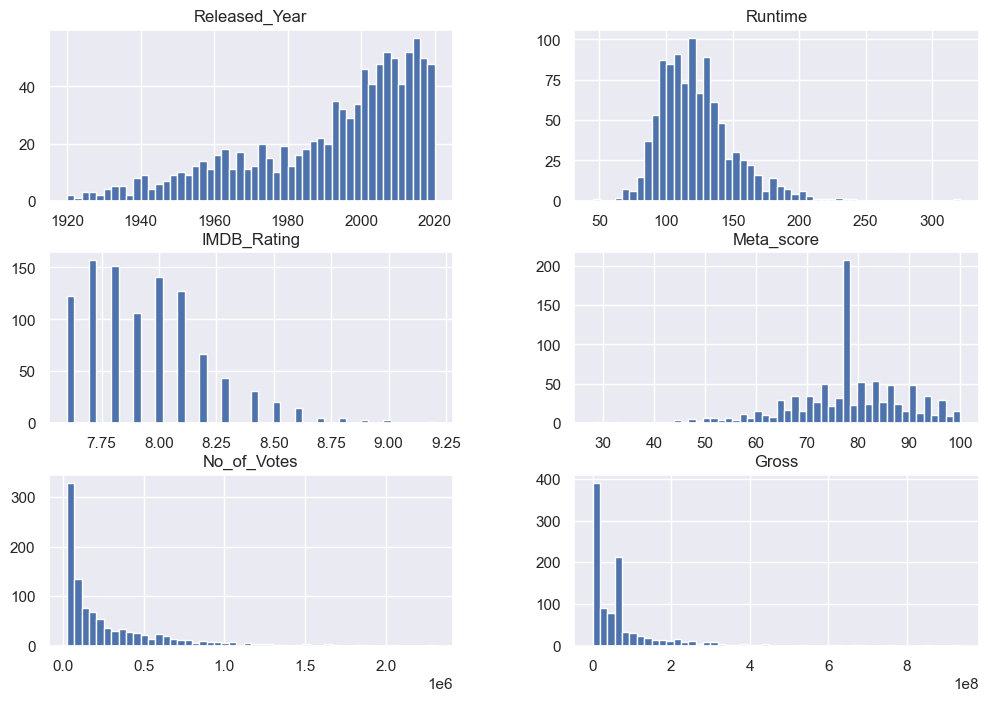

In [46]:
# Distribuição dos Atributos Numéricos

ax = df_eda[numerical_list].hist(bins=50, figsize=(12, 8))
plt.show()

#### Boxplots de Atributos Numéricos 

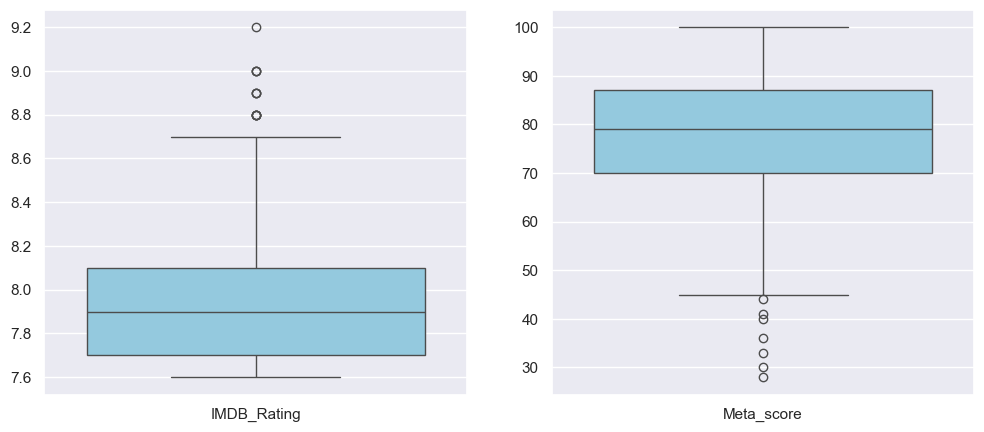

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# IMDB_Rating Boxplot
ax1 = sns.boxplot(data=df[['IMDB_Rating']],color = 'skyblue', showfliers=True, ax=axes[0])
# Meta_score Boxplot
ax2 = sns.boxplot(data=df[['Meta_score']],color = 'skyblue', showfliers=True, ax=axes[1])

plt.show()

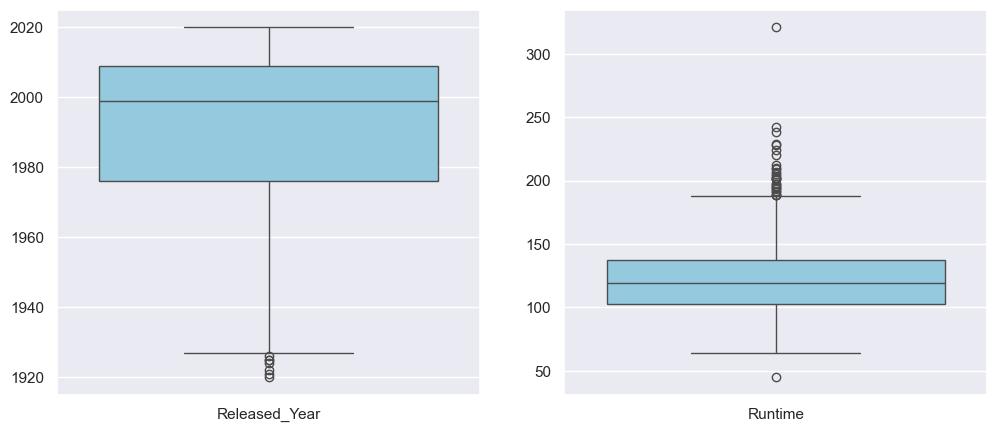

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Released_Year Boxplot
ax1 = sns.boxplot(data=df[['Released_Year']],color = 'skyblue', showfliers=True, ax=axes[0])
# Runtime Boxplot
ax2 = sns.boxplot(data=df[['Runtime']],color = 'skyblue', showfliers=True, ax=axes[1])

plt.show()

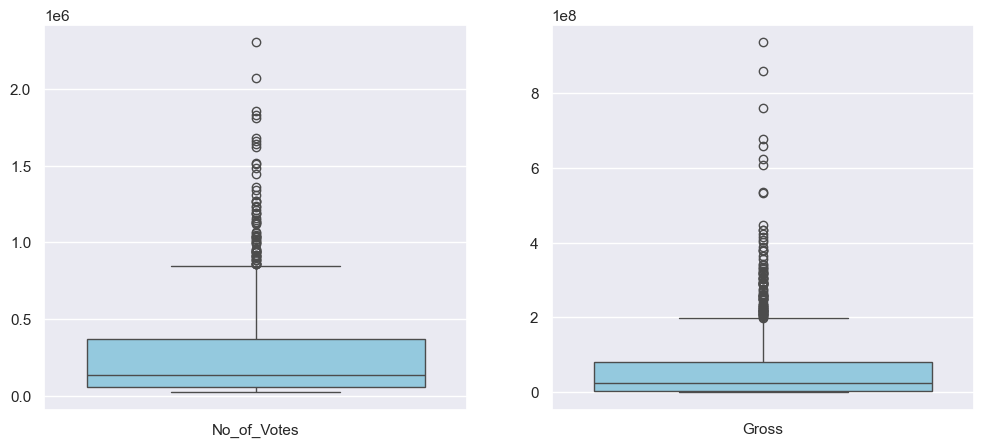

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# No_of_Votes Boxplot
ax1 = sns.boxplot(data=df[['No_of_Votes']],color = 'skyblue', showfliers=True, ax=axes[0])
# Gross Boxplot
ax2 = sns.boxplot(data=df[['Gross']],color = 'skyblue', showfliers=True, ax=axes[1])

plt.show()

### Atributos Categóricos

#### Contagem de Categorias ("Certificate")

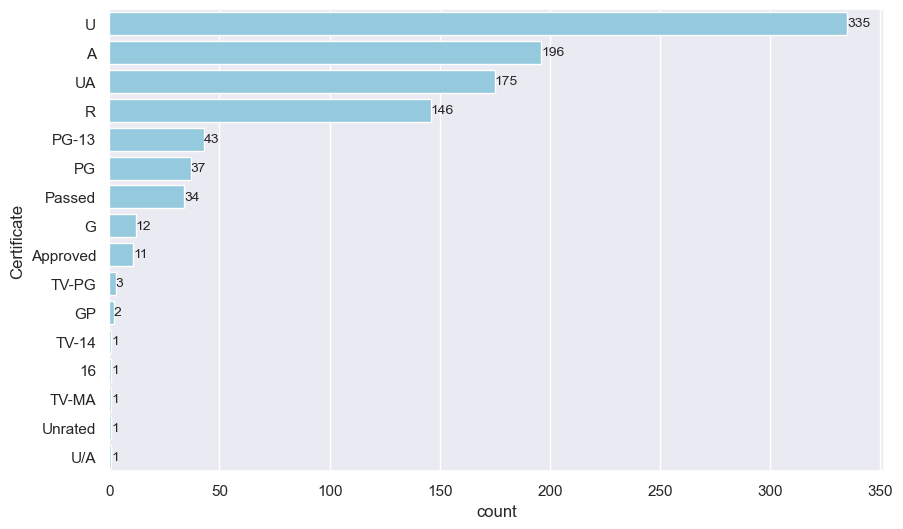

In [53]:
ax = sns.countplot(df_eda, y="Certificate", order=df_eda['Certificate'].value_counts().index, color = 'skyblue')
ax.bar_label(ax.containers[0], fontsize=10);
plt.show()

#### Contagem de Aparições de Diretores

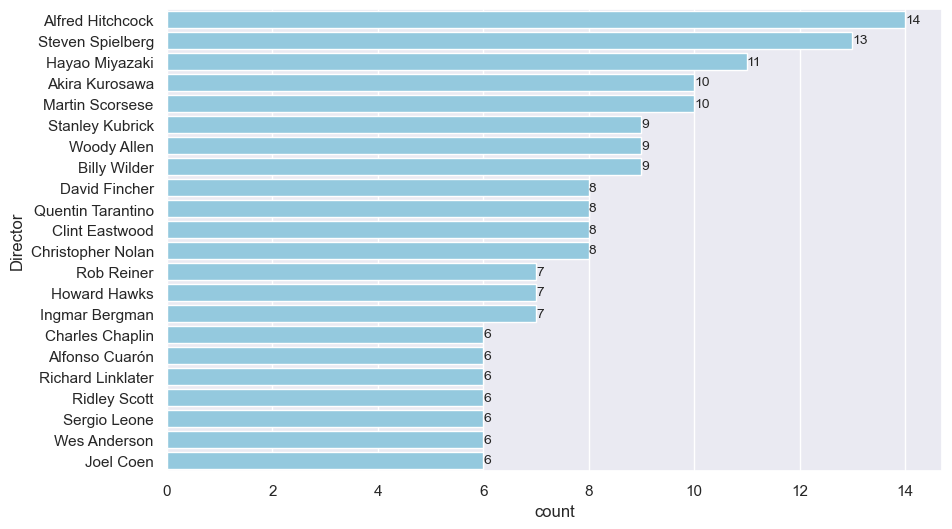

In [55]:
ax = sns.countplot(df_eda, y="Director", order=df_eda['Director'].value_counts().index[:22], color = 'skyblue')
ax.bar_label(ax.containers[0], fontsize=10);
plt.show()

#### Contagem de Participação de Atores

In [57]:
# Concatenação das 4 colunas de atores e conversão para DataFrame
stars = pd.concat([df_eda["Star1"], df_eda["Star2"], df_eda["Star3"], df_eda["Star4"]])
stars = stars.to_frame()
stars = stars.rename(columns={0: "Actor"})
stars = stars.reset_index(drop=True)

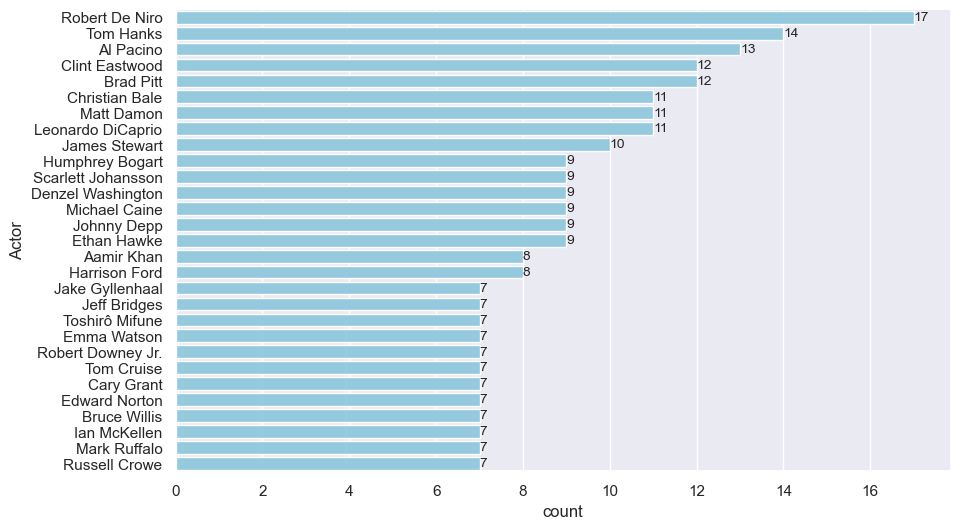

In [58]:
ax = sns.countplot(stars, y="Actor", order=stars['Actor'].value_counts().index[:29], color = 'skyblue')
ax.bar_label(ax.containers[0], fontsize=10);
plt.show()

### Relações Bivariadas

Nesta seção, veremos relações bivariadas focando especialmente em três atributos que temos: Nota IMDB ("IMDB_Rating"), Nota Meta ("Meta_score") e Faturamento ("Gross"). Logo, compararemos as outras variáveis que serão mencionadas no título da subseção com estes atributos.

In [61]:
def plot_graphs_biv(DF, X_COLUMN, Y_COLUMN, N = 20, TITLE = 'placeholder', CHANGE_TYPE = False):
    """
    Seleciona duas colunas de um DataFrame, ordena pelo valor da coluna X escolhida (X_COLUMN) e seleciona os N primeiros valores.
    A partir disso, plota gráfico demonstrando os N maiores atributos das colunas selecionadas em um barplot.

    Parameters
    ----------
    DF: pd.DataFrame
        DataFrame selecionado.

    X_COLUMN: str
        Coluna numérica, onde serão extraídos e calculados os valores.

    Y_COLUMN: str
        Coluna categórica onde serão comparados valores.

    N: int
        Número de instâncias que aparecerão no gráfico.

    TITLE: str
        Título do gráfico.

    CHANGE_TYPE: str
        Caso seja escolhido algum type, alterará a coluna Y para o tipo escolhido.

    Returns
    -------
    Gráfico
    """
    if CHANGE_TYPE:
        DF[Y_COLUMN] = DF[Y_COLUMN].astype(CHANGE_TYPE)
            
    DF = DF.sort_values(by=[X_COLUMN], ascending = False)

    ax = sns.barplot(DF.head(N), y = Y_COLUMN, x = X_COLUMN, errorbar = None, color = 'skyblue')
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.set_title(TITLE, fontsize=15);

    return

#### Ano

In [63]:
# Agrupa Released_Year com máximos e médias de: Meta_score, IMDB_Rating e Gross
df_year = df_eda.groupby(['Released_Year']).agg(meta_mean = ('Meta_score', 'mean'), 
                                                meta_max = ('Meta_score', 'max'),
                                                imdb_mean = ('IMDB_Rating', 'mean'), 
                                                imdb_max = ('IMDB_Rating', 'max'),
                                                gross_mean = ('Gross', 'mean'), 
                                                gross_max = ('Gross', 'max'),
                                                year_count = ('Gross', 'count'),
                                               ).reset_index()
df_year

Released_Year  meta_mean   meta_max  imdb_mean  imdb_max    gross_mean  \
0            1920  77.969121  77.969121   8.100000       8.1  6.808257e+07   
1            1921  77.969121  77.969121   8.300000       8.3  5.450000e+06   
2            1922  77.969121  77.969121   7.900000       7.9  6.808257e+07   
3            1924  77.969121  77.969121   8.200000       8.2  9.773750e+05   
4            1925  87.484561  97.000000   8.100000       8.2  2.750485e+06   
..            ...        ...        ...        ...       ...           ...   
94           2016  78.670852  96.000000   7.935714       8.4  1.048561e+08   
95           2017  79.268517  94.000000   7.890909       8.4  9.988536e+07   
96           2018  77.779722  96.000000   7.994737       8.4  1.551669e+08   
97           2019  76.997315  96.000000   7.995652       8.6  1.253618e+08   
98           2020  81.156374  90.000000   8.133333       8.6  6.808257e+07   

       gross_max  year_count  
0   6.808257e+07           1  
1   5.450000e+06           1  
2   6.808257e+07           1  
3   9.773750e+05           1  
4   5.450000e+06           2  
..           ...         ...  
94  5.321773e+08          28  
95  3.898131e+08          22  
96  6.788155e+08          19  
97  8.583730e+08          23  
98  6.808257e+07           6  

[99 rows x 8 columns]

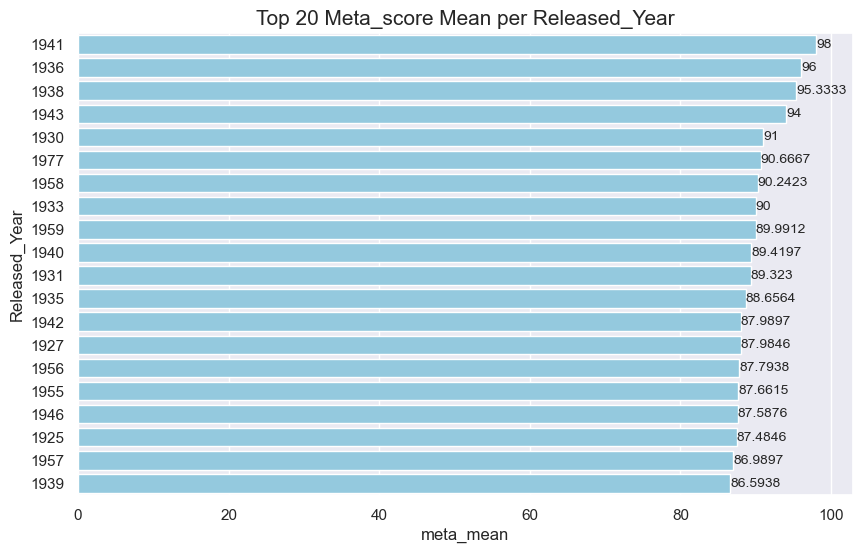

In [64]:
plot_graphs_biv(DF = df_year, X_COLUMN = 'meta_mean', Y_COLUMN = 'Released_Year', N = 20, 
                TITLE = 'Top 20 Meta_score Mean per Released_Year', CHANGE_TYPE = str)

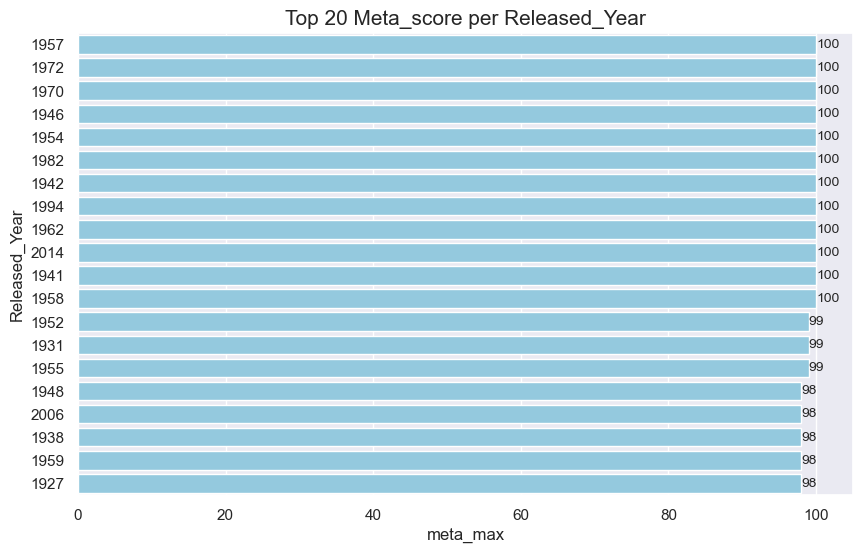

In [65]:
plot_graphs_biv(DF = df_year, X_COLUMN = 'meta_max', Y_COLUMN = 'Released_Year', N = 20, 
                TITLE = 'Top 20 Meta_score per Released_Year', CHANGE_TYPE = str)

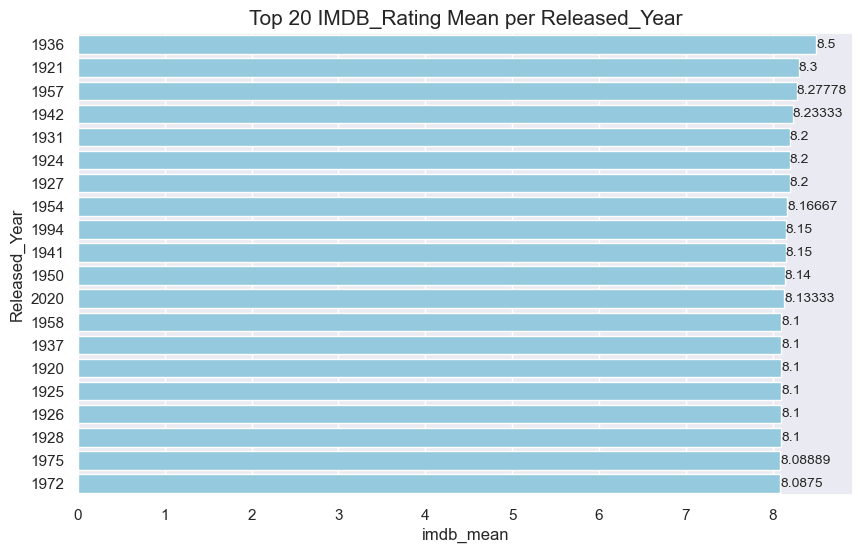

In [66]:
plot_graphs_biv(DF = df_year, X_COLUMN = 'imdb_mean', Y_COLUMN = 'Released_Year', N = 20, 
                TITLE = 'Top 20 IMDB_Rating Mean per Released_Year', CHANGE_TYPE = str)

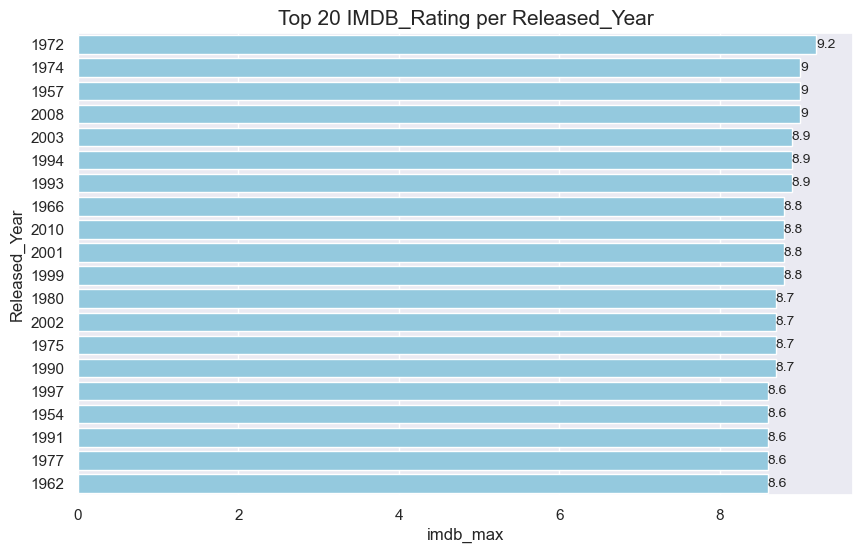

In [67]:
plot_graphs_biv(DF = df_year, X_COLUMN = 'imdb_max', Y_COLUMN = 'Released_Year', N = 20, 
                TITLE = 'Top 20 IMDB_Rating per Released_Year', CHANGE_TYPE = str)

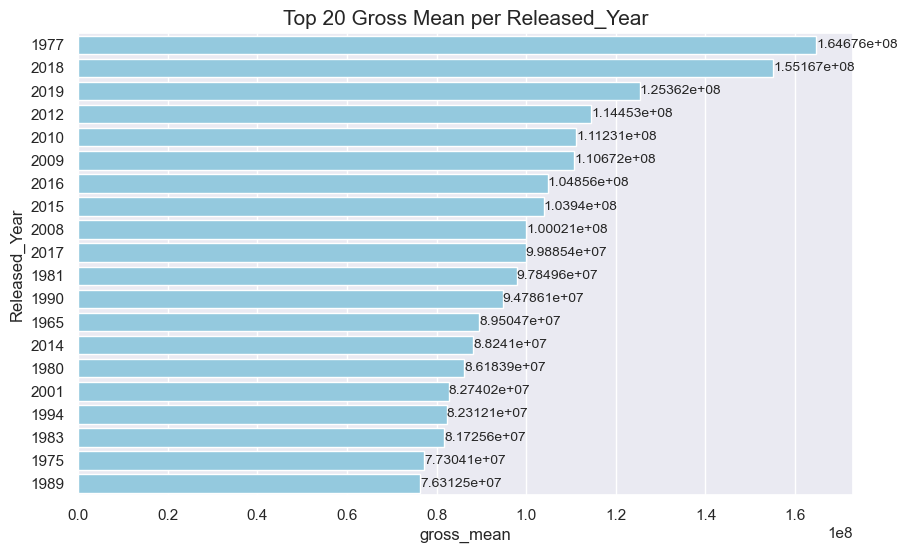

In [68]:
plot_graphs_biv(DF = df_year, X_COLUMN = 'gross_mean', Y_COLUMN = 'Released_Year', N = 20, 
                TITLE = 'Top 20 Gross Mean per Released_Year', CHANGE_TYPE = str)

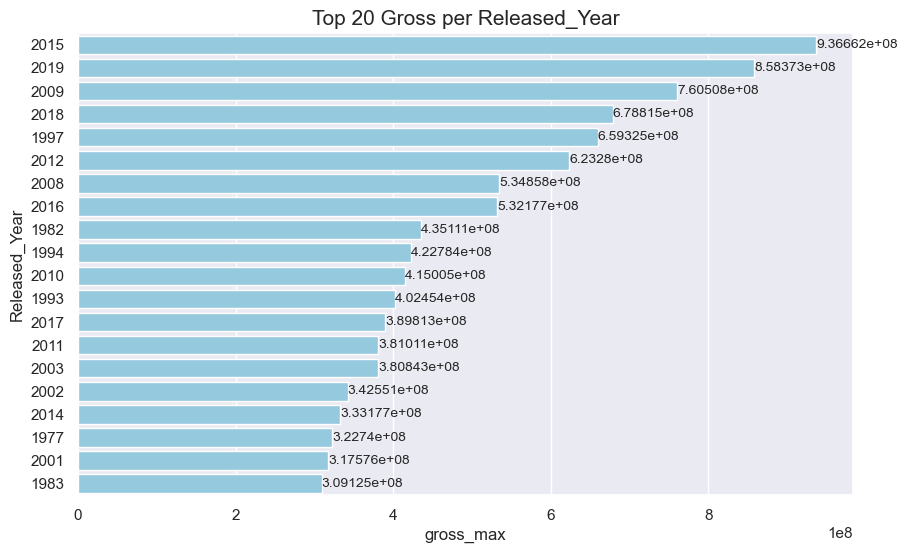

In [69]:
plot_graphs_biv(DF = df_year, X_COLUMN = 'gross_max', Y_COLUMN = 'Released_Year', N = 20, 
                TITLE = 'Top 20 Gross per Released_Year', CHANGE_TYPE = str)

Na subseção referente a Released_Year, observamos que:
- No Meta_score, tanto as médias quanto os valores máximos apresentam seus maiores valores em filmes anteriores aos anos de 1980;
- No IMDB_Rating, ainda que se acompanhe parte do padrão do Meta_score, se apresentaram no top dos valores máximos filmes dos anos 1990 e 2000;
- No Gross, com exceção da média de faturamento em 1977, parte majoritária demonstrou mais faturamento após os anos 2000;

#### Diretor

In [72]:
# Agrupa Director com máximos e médias de: Meta_score, IMDB_Rating e Gross
df_director = df_eda.groupby(['Director']).agg(meta_mean = ('Meta_score', 'mean'), 
                                                meta_max = ('Meta_score', 'max'),
                                                imdb_mean = ('IMDB_Rating', 'mean'), 
                                                imdb_max = ('IMDB_Rating', 'max'),
                                                gross_mean = ('Gross', 'mean'), 
                                                gross_max = ('Gross', 'max'),
                                                director_count = ('Gross', 'count'),
                                                ).reset_index()
df_director

Director  meta_mean   meta_max  imdb_mean  imdb_max  \
0             Aamir Khan  77.969121  77.969121       8.40       8.4   
1           Aaron Sorkin  77.000000  77.000000       7.80       7.8   
2    Abdellatif Kechiche  89.000000  89.000000       7.70       7.7   
3       Abhishek Chaubey  77.969121  77.969121       7.80       7.8   
4        Abhishek Kapoor  40.000000  40.000000       7.70       7.7   
..                   ...        ...        ...        ...       ...   
543          Zack Snyder  54.000000  56.000000       7.60       7.6   
544       Zaza Urushadze  73.000000  73.000000       8.20       8.2   
545          Zoya Akhtar  71.484561  77.969121       8.05       8.1   
546          Çagan Irmak  77.969121  77.969121       8.30       8.3   
547     Ömer Faruk Sorak  77.969121  77.969121       8.00       8.0   

       gross_mean     gross_max  director_count  
0    1.223869e+06  1.223869e+06               1  
1    6.808257e+07  6.808257e+07               1  
2    2.199675e+06  2.199675e+06               1  
3    6.808257e+07  6.808257e+07               1  
4    1.122527e+06  1.122527e+06               1  
..            ...           ...             ...  
543  1.590624e+08  2.106149e+08               2  
544  1.445010e+05  1.445010e+05               1  
545  4.337510e+06  5.566534e+06               2  
546  6.808257e+07  6.808257e+07               1  
547  6.808257e+07  6.808257e+07               1  

[548 rows x 8 columns]

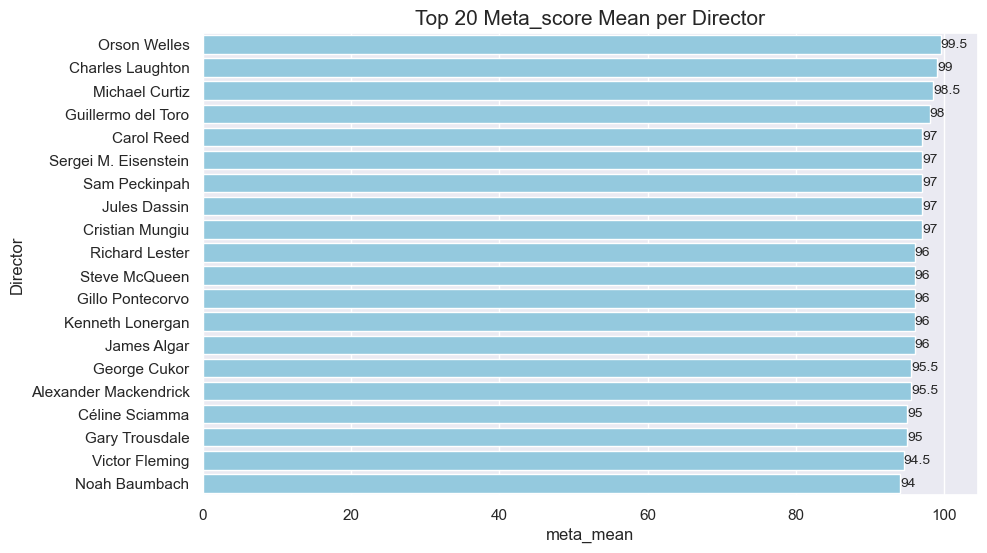

In [73]:
plot_graphs_biv(DF = df_director, X_COLUMN = 'meta_mean', Y_COLUMN = 'Director', N = 20, 
                TITLE = 'Top 20 Meta_score Mean per Director')

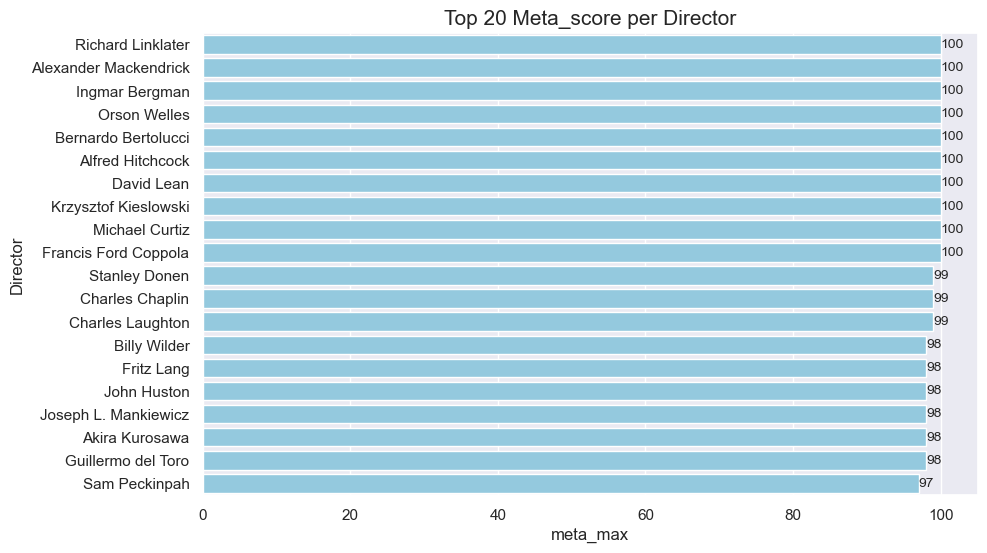

In [74]:
plot_graphs_biv(DF = df_director, X_COLUMN = 'meta_max', Y_COLUMN = 'Director', N = 20, 
                TITLE = 'Top 20 Meta_score per Director')

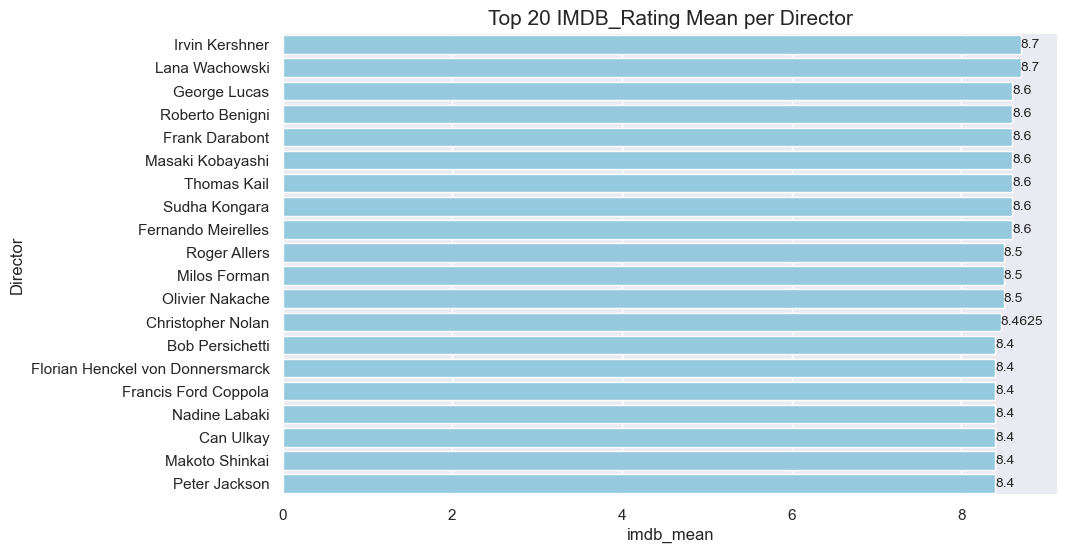

In [75]:
plot_graphs_biv(DF = df_director, X_COLUMN = 'imdb_mean', Y_COLUMN = 'Director', N = 20, 
                TITLE = 'Top 20 IMDB_Rating Mean per Director')

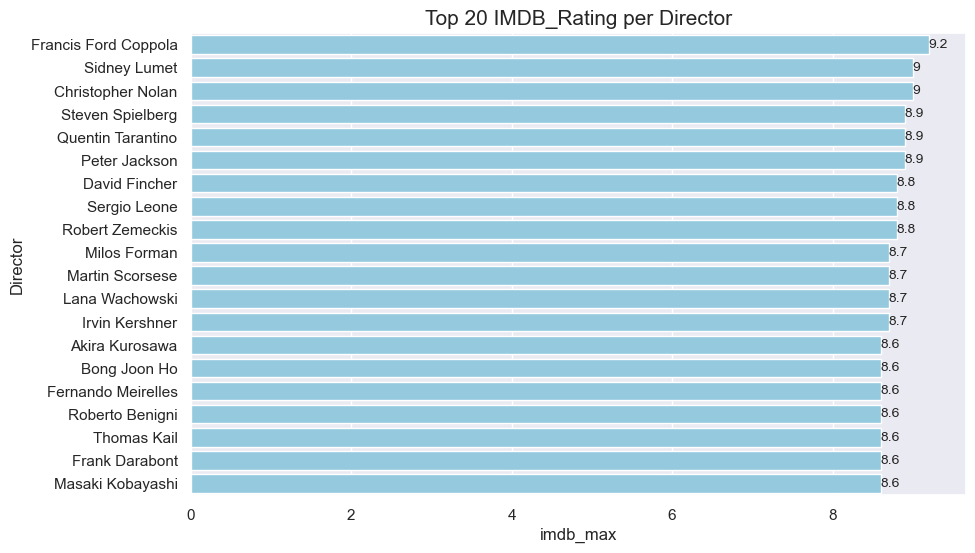

In [76]:
plot_graphs_biv(DF = df_director, X_COLUMN = 'imdb_max', Y_COLUMN = 'Director', N = 20, 
                TITLE = 'Top 20 IMDB_Rating per Director')

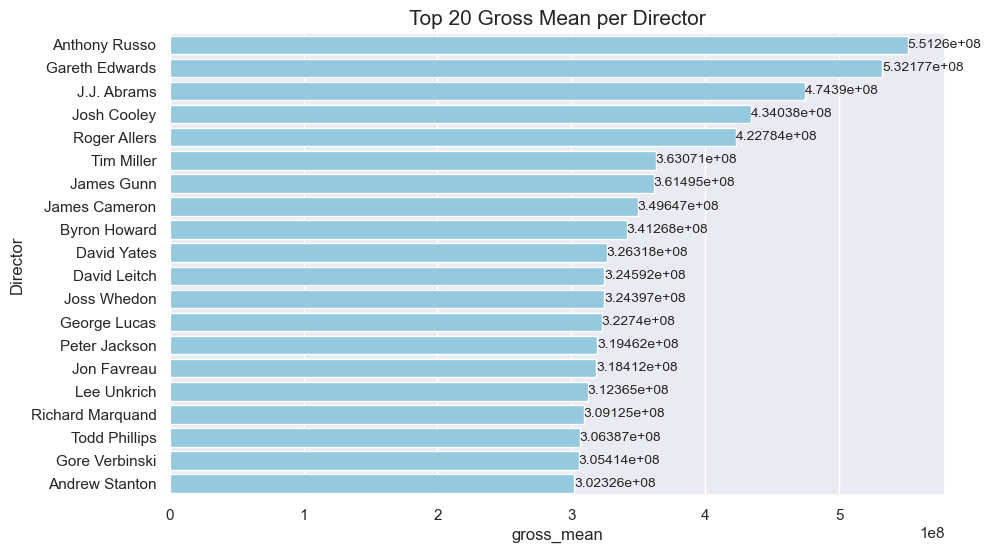

In [77]:
plot_graphs_biv(DF = df_director, X_COLUMN = 'gross_mean', Y_COLUMN = 'Director', N = 20, 
                TITLE = 'Top 20 Gross Mean per Director')

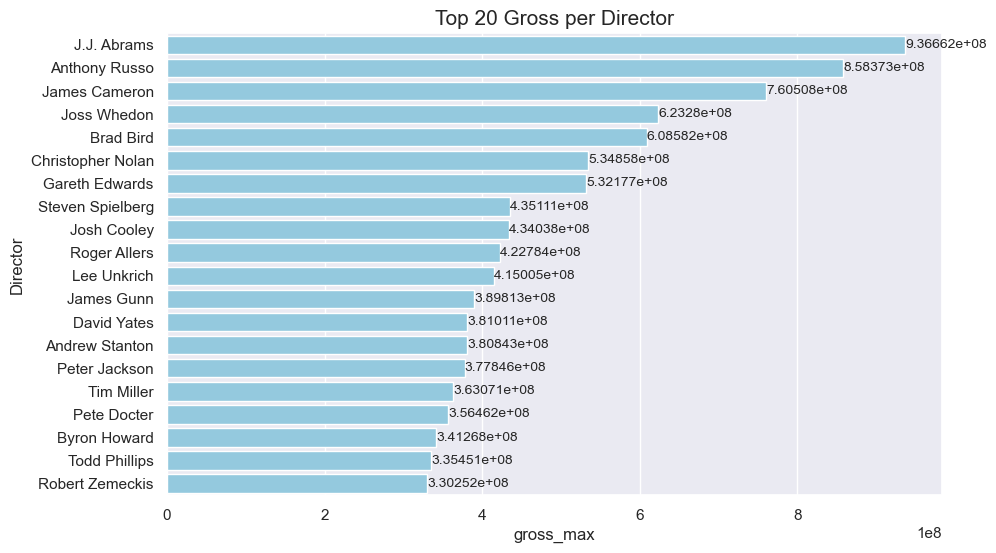

In [78]:
plot_graphs_biv(DF = df_director, X_COLUMN = 'gross_max', Y_COLUMN = 'Director', N = 20, 
                TITLE = 'Top 20 Gross per Director')

Na subseção referente a Director, observamos que:
- No Meta_score, Orson Welles obteve a maior média, e 10 diretores alcançara a pontuação máxima no Meta_score
- No IMDB_Rating, Irvin Kershner e Lana Wachowski obtiveram as maiores médias, e Francis Ford Coppola obteve a maior nota;
- No Gross, Anthony Russo obteve o maior faturamento médio, e J.J. Abrams teve o maior faturamento em um filme.

#### Tempo

In [81]:
df_time = df_eda[['Runtime','IMDB_Rating','Meta_score','Gross']]
df_time

Runtime  IMDB_Rating  Meta_score         Gross
0        175          9.2       100.0  1.349664e+08
1        152          9.0        84.0  5.348584e+08
2        202          9.0        90.0  5.730000e+07
3         96          9.0        96.0  4.360000e+06
4        201          8.9        94.0  3.778459e+08
..       ...          ...         ...           ...
994      115          7.6        76.0  6.808257e+07
995      201          7.6        84.0  6.808257e+07
996      118          7.6        85.0  3.050000e+07
997       97          7.6        78.0  6.808257e+07
998       86          7.6        93.0  6.808257e+07

[999 rows x 4 columns]

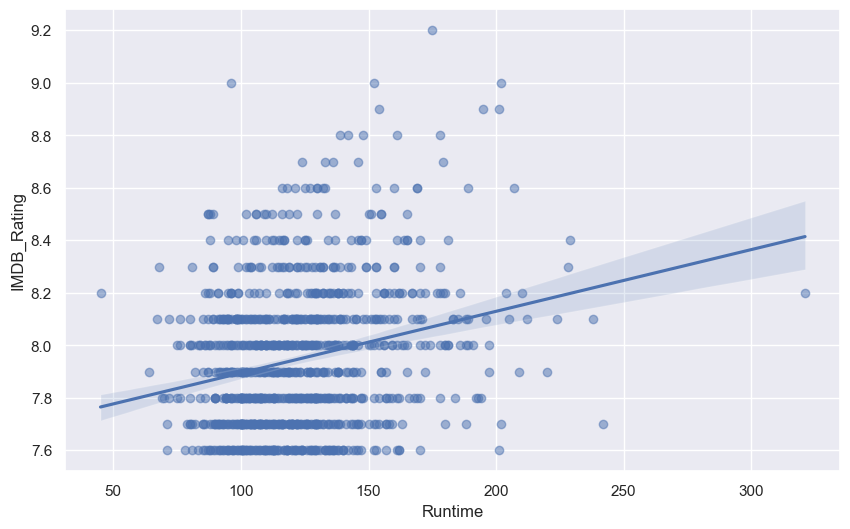

In [82]:
sns.regplot(data=df_time, x="Runtime", y="IMDB_Rating", scatter_kws={"alpha":0.5})
plt.show()

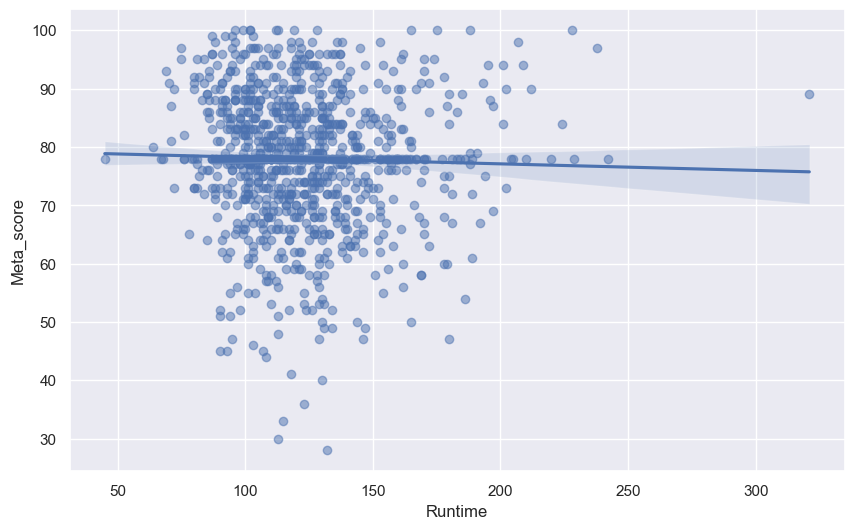

In [83]:
sns.regplot(data=df_time, x="Runtime", y="Meta_score", scatter_kws={"alpha":0.5})
plt.show()

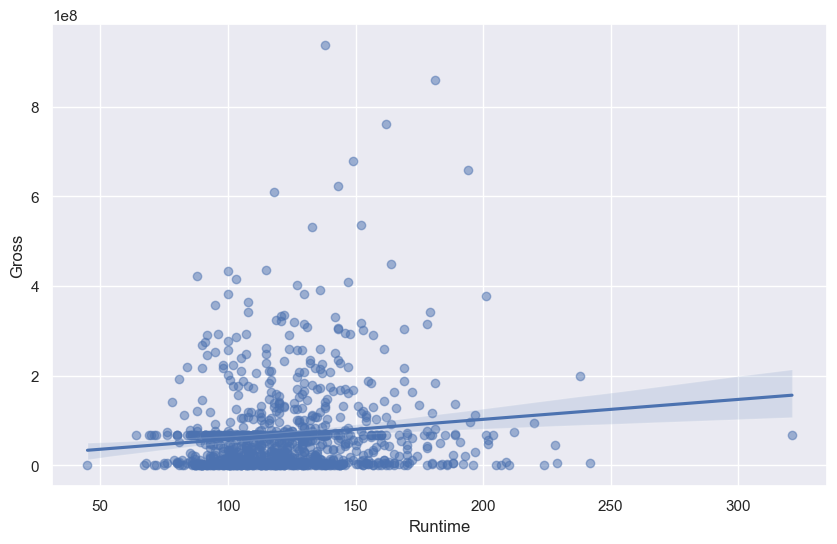

In [84]:
sns.regplot(data=df_time, x="Runtime", y="Gross", scatter_kws={"alpha":0.5})
plt.show()

Não foi possível se extrair muita informação de Runtime, logo tentaremos transformar os valores numéricos em categóricos a partir de bins

In [86]:
# Cria bins para a construção de segundo DataFrame de RunTime
bins_runtime = [0, 60, 90, 120, 150, 180, 240, df_time["Runtime"].max()]
labels_runtime = ["<60", "60-90", "90-120", "120-150", "150-180", "180-240", "240+"]

df_time["Runtime_bin"] = pd.cut(df_time["Runtime"], bins = bins_runtime, labels = labels_runtime, right = False)

C:\Users\erhon\AppData\Local\Temp\ipykernel_11940\1196524124.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time["Runtime_bin"] = pd.cut(df_time["Runtime"], bins = bins_runtime, labels = labels_runtime, right = False)


In [87]:
# Agrupa Runtime_bin com máximos e médias de: Meta_score, IMDB_Rating e Gross
df_runtime_stats = df_time.groupby("Runtime_bin").agg(imdb_mean=("IMDB_Rating", "mean"),
                                                      imdb_max=("IMDB_Rating", "max"),
                                                      meta_mean=("Meta_score", "mean"),
                                                      meta_max=("Meta_score", "max"),
                                                      gross_mean=("Gross", "mean"),
                                                      gross_max=("Gross", "max"),
                                                      runtime_count=("Runtime", "count")
                                                     ).reset_index()
df_runtime_stats

C:\Users\erhon\AppData\Local\Temp\ipykernel_11940\3232191885.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_runtime_stats = df_time.groupby("Runtime_bin").agg(imdb_mean=("IMDB_Rating", "mean"),


Runtime_bin  imdb_mean  imdb_max  meta_mean    meta_max    gross_mean  \
0         <60   8.200000       8.2  77.969121   77.969121  9.773750e+05   
1       60-90   7.934328       8.5  82.635800   99.000000  4.558974e+07   
2      90-120   7.892009       9.0  77.952250  100.000000  5.759838e+07   
3     120-150   7.956268       8.8  76.838334  100.000000  7.892908e+07   
4     150-180   8.095283       9.2  77.596782  100.000000  8.319704e+07   
5     180-240   8.107143       9.0  80.612431  100.000000  8.968706e+07   
6        240+   7.700000       7.7  77.969121   77.969121  4.414535e+06   

     gross_max  runtime_count  
0     977375.0              1  
1  422783777.0             67  
2  608581744.0            438  
3  936662225.0            343  
4  760507625.0            106  
5  858373000.0             42  
6    4414535.0              1

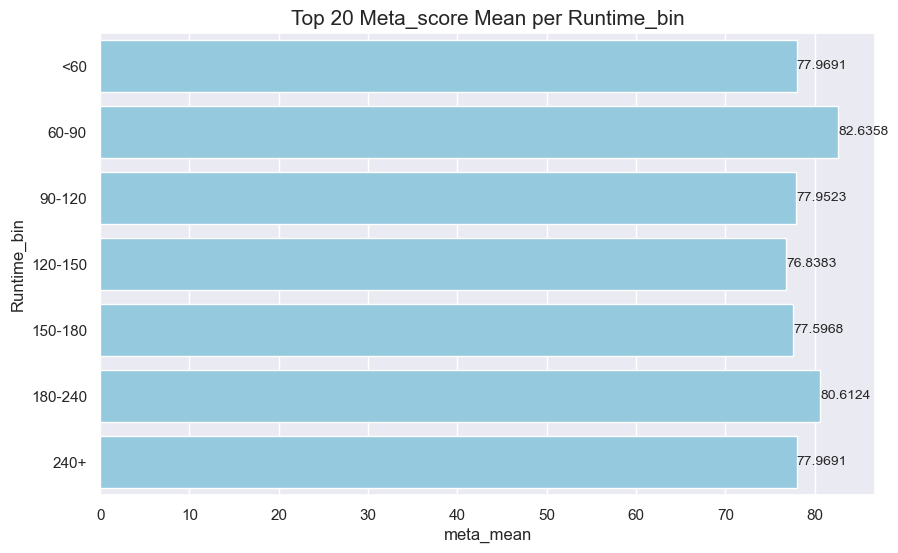

In [88]:
plot_graphs_biv(DF = df_runtime_stats, X_COLUMN = 'meta_mean', Y_COLUMN = 'Runtime_bin', N = 20, 
                TITLE = 'Top 20 Meta_score Mean per Runtime_bin')

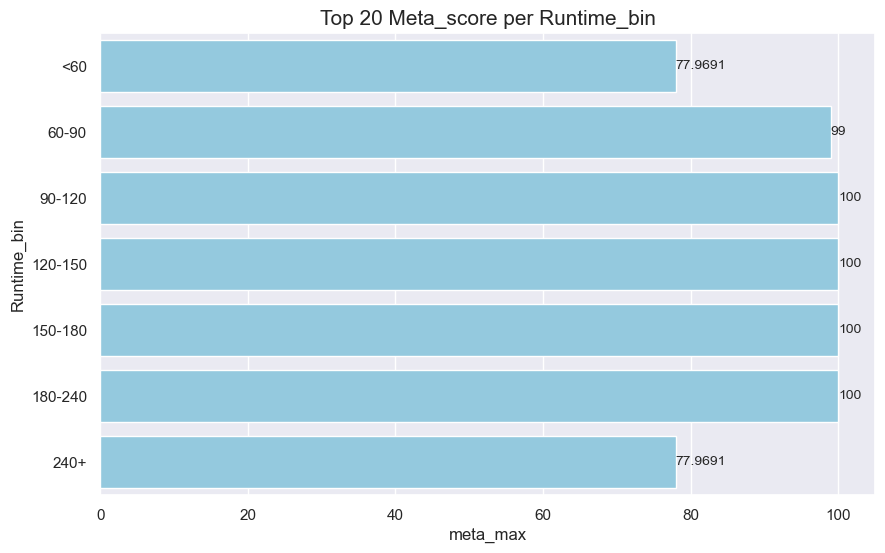

In [89]:
plot_graphs_biv(DF = df_runtime_stats, X_COLUMN = 'meta_max', Y_COLUMN = 'Runtime_bin', N = 20, 
                TITLE = 'Top 20 Meta_score per Runtime_bin')

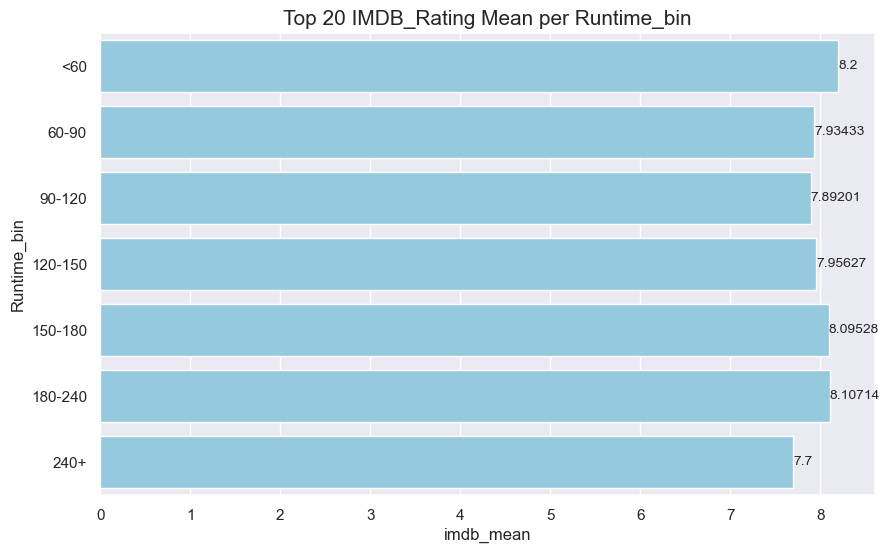

In [90]:
plot_graphs_biv(DF = df_runtime_stats, X_COLUMN = 'imdb_mean', Y_COLUMN = 'Runtime_bin', N = 20, 
                TITLE = 'Top 20 IMDB_Rating Mean per Runtime_bin')

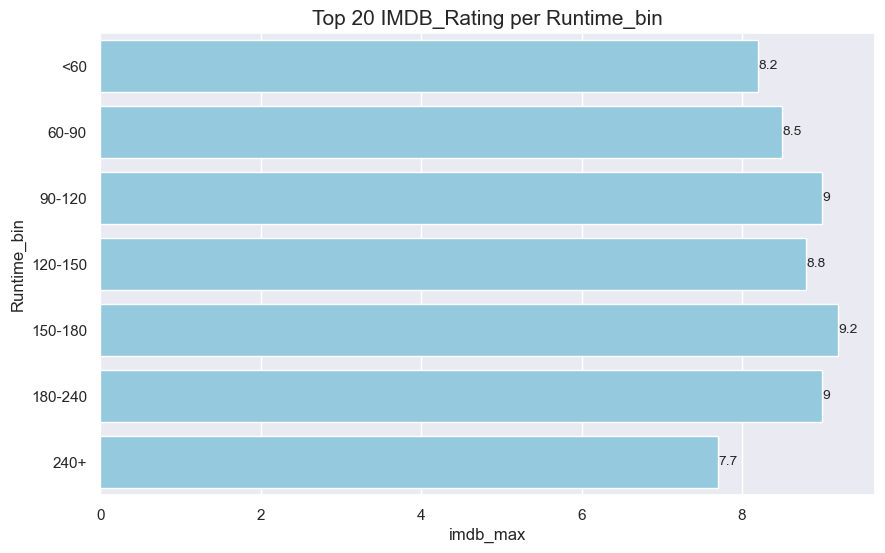

In [91]:
plot_graphs_biv(DF = df_runtime_stats, X_COLUMN = 'imdb_max', Y_COLUMN = 'Runtime_bin', N = 20, 
                TITLE = 'Top 20 IMDB_Rating per Runtime_bin')

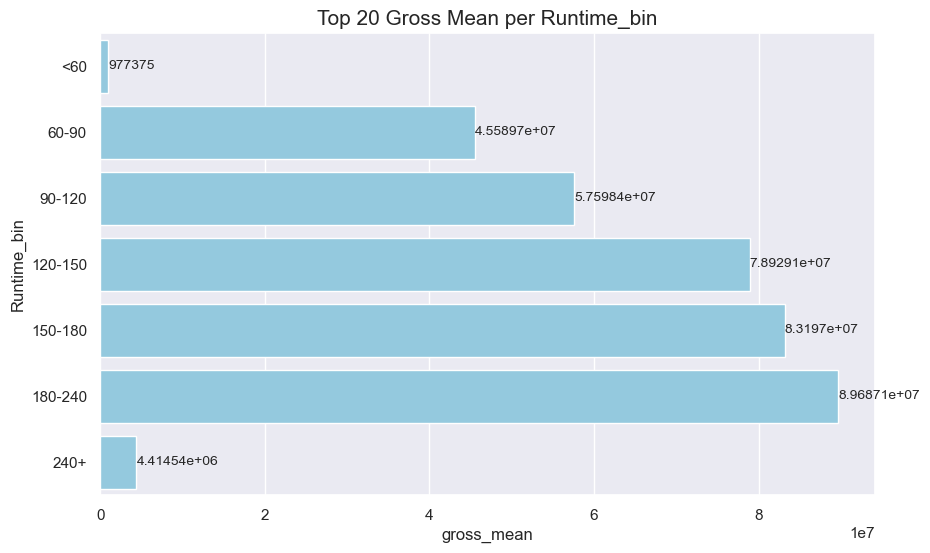

In [92]:
plot_graphs_biv(DF = df_runtime_stats, X_COLUMN = 'gross_mean', Y_COLUMN = 'Runtime_bin', N = 20, 
                TITLE = 'Top 20 Gross Mean per Runtime_bin')

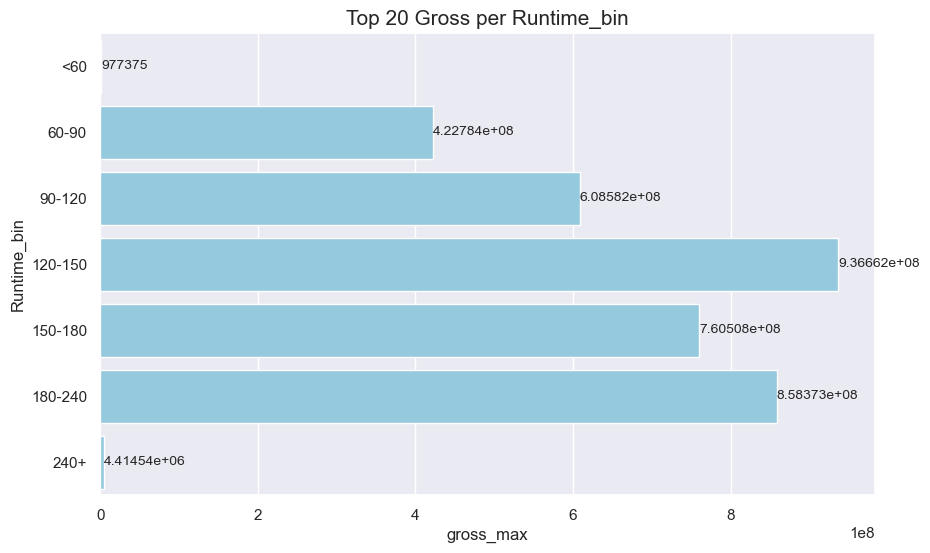

In [93]:
plot_graphs_biv(DF = df_runtime_stats, X_COLUMN = 'gross_max', Y_COLUMN = 'Runtime_bin', N = 20, 
                TITLE = 'Top 20 Gross per Runtime_bin')

Na subseção referente a Runtime, observamos que:
- No Meta_score, os valores médios se demosntraram aproximados, quando os scores máximos demonstraram que filmes entre 1h e 4h apresentaram nota máxima parecida; 
- No IMDB_Rating, tanto o valor médio quanto os valores máximos são muito bem distribuídos, indicando possível baixa influência;
- No Gross, filmes entre 3h e 4h apresentaram maior faturamento médio, enquanto filmes entre 2h e 2.5h apresentaram maior faturamento máximo


#### Nº de votos

In [96]:
df_nvotes = df_eda[['No_of_Votes','IMDB_Rating','Meta_score','Gross']]
df_nvotes

No_of_Votes  IMDB_Rating  Meta_score         Gross
0        1620367          9.2       100.0  1.349664e+08
1        2303232          9.0        84.0  5.348584e+08
2        1129952          9.0        90.0  5.730000e+07
3         689845          9.0        96.0  4.360000e+06
4        1642758          8.9        94.0  3.778459e+08
..           ...          ...         ...           ...
994       166544          7.6        76.0  6.808257e+07
995        34075          7.6        84.0  6.808257e+07
996        43374          7.6        85.0  3.050000e+07
997        26471          7.6        78.0  6.808257e+07
998        51853          7.6        93.0  6.808257e+07

[999 rows x 4 columns]

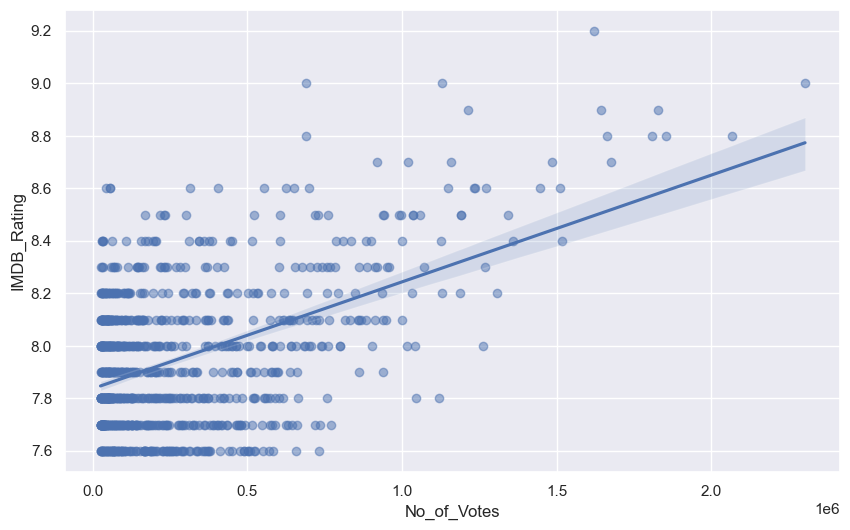

In [97]:
sns.regplot(data=df_nvotes, x="No_of_Votes", y="IMDB_Rating", scatter_kws={"alpha":0.5})
plt.show()

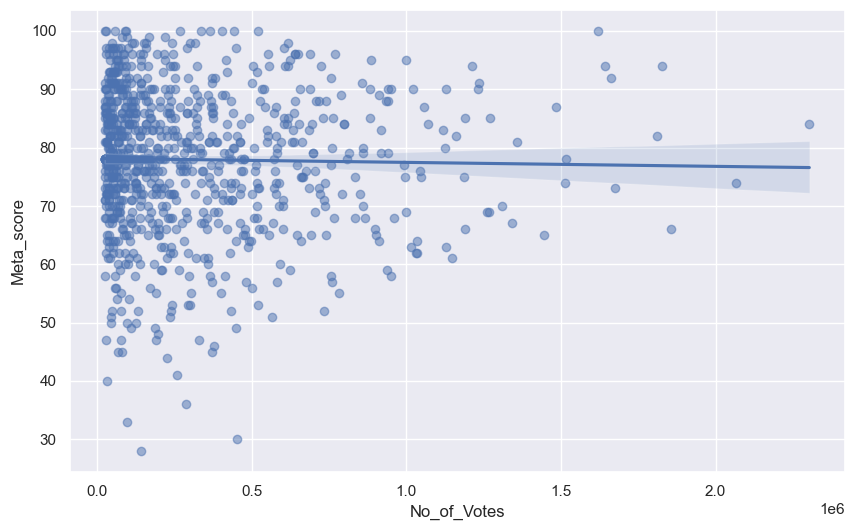

In [98]:
sns.regplot(data=df_nvotes, x="No_of_Votes", y="Meta_score", scatter_kws={"alpha":0.5})
plt.show()

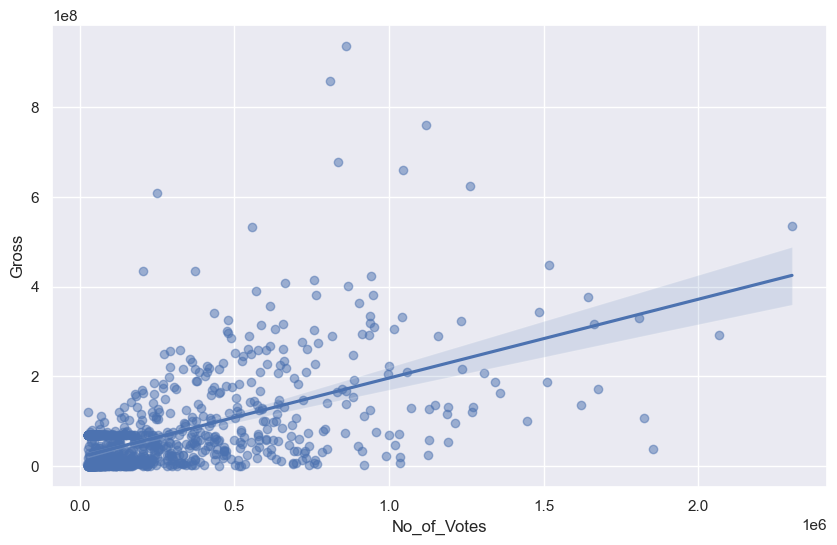

In [99]:
sns.regplot(data=df_nvotes, x="No_of_Votes", y="Gross", scatter_kws={"alpha":0.5})
plt.show()

Não foi possível se extrair muita informação de No_of_Votes, logo tentaremos transformar os valores numéricos em categóricos a partir de bins

In [101]:
# Cria bins para a construção de segundo DataFrame de No_of_Votes
bins_n_vote = [0, 50_000, 100_000, 250_000, 500_000, 1_000_000, df_nvotes["No_of_Votes"].max()]
labels_n_vote = ["<50k", "50k-100k", "100k-250k", "250k-500k", "500k-1M", "1M+"]

df_nvotes["No_of_Votes_bin"] = pd.cut(df_nvotes["No_of_Votes"], bins=bins_n_vote, labels=labels_n_vote, right=False)

C:\Users\erhon\AppData\Local\Temp\ipykernel_11940\2658920971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nvotes["No_of_Votes_bin"] = pd.cut(df_nvotes["No_of_Votes"], bins=bins_n_vote, labels=labels_n_vote, right=False)


In [102]:
# Agrupa No_of_Votes_bin com máximos e médias de: Meta_score, IMDB_Rating e Gross
df_n_votes_stats = df_nvotes.groupby("No_of_Votes_bin").agg(imdb_mean=("IMDB_Rating", "mean"),
                                                            imdb_max=("IMDB_Rating", "max"),
                                                            meta_mean=("Meta_score", "mean"),
                                                            meta_max=("Meta_score", "max"),
                                                            gross_mean=("Gross", "mean"),
                                                            gross_max=("Gross", "max"),
                                                            n_votes_count=("No_of_Votes", "count")
                                                           ).reset_index()
df_n_votes_stats

C:\Users\erhon\AppData\Local\Temp\ipykernel_11940\2403985183.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_n_votes_stats = df_nvotes.groupby("No_of_Votes_bin").agg(imdb_mean=("IMDB_Rating", "mean"),


No_of_Votes_bin  imdb_mean  imdb_max  meta_mean  meta_max    gross_mean  \
0            <50k   7.898068       8.6  78.687953     100.0  3.102875e+07   
1        50k-100k   7.894884       8.6  79.095288     100.0  2.833682e+07   
2       100k-250k   7.902155       8.5  77.501382      99.0  3.938704e+07   
3       250k-500k   7.896933       8.6  75.846247     100.0  9.006322e+07   
4         500k-1M   8.073759       9.0  78.425532     100.0  1.608390e+08   
5             1M+   8.495000       9.2  77.800000     100.0  2.116968e+08   

     gross_max  n_votes_count  
0  119285432.0            207  
1  111722000.0            215  
2  434038008.0            232  
3  608581744.0            163  
4  936662225.0            141  
5  760507625.0             40

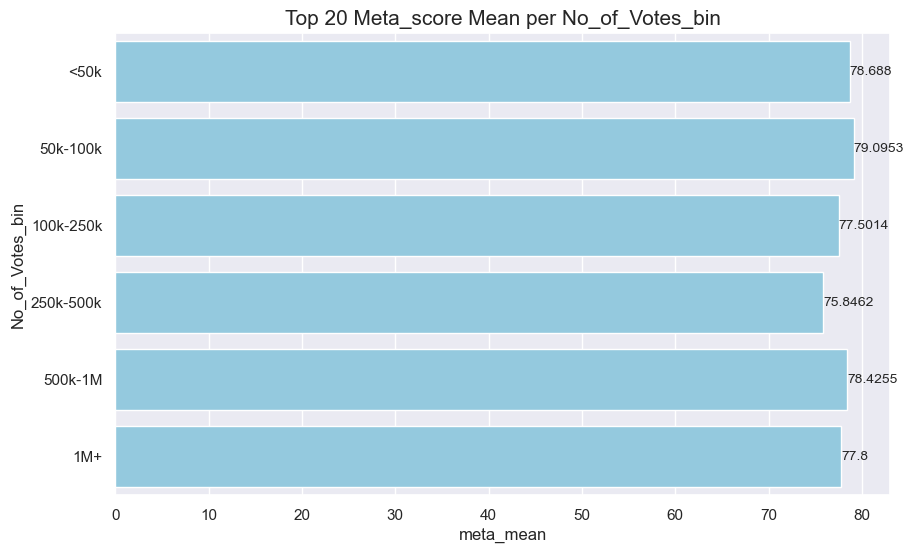

In [103]:
plot_graphs_biv(DF = df_n_votes_stats, X_COLUMN = 'meta_mean', Y_COLUMN = 'No_of_Votes_bin', N = 20, 
                TITLE = 'Top 20 Meta_score Mean per No_of_Votes_bin')

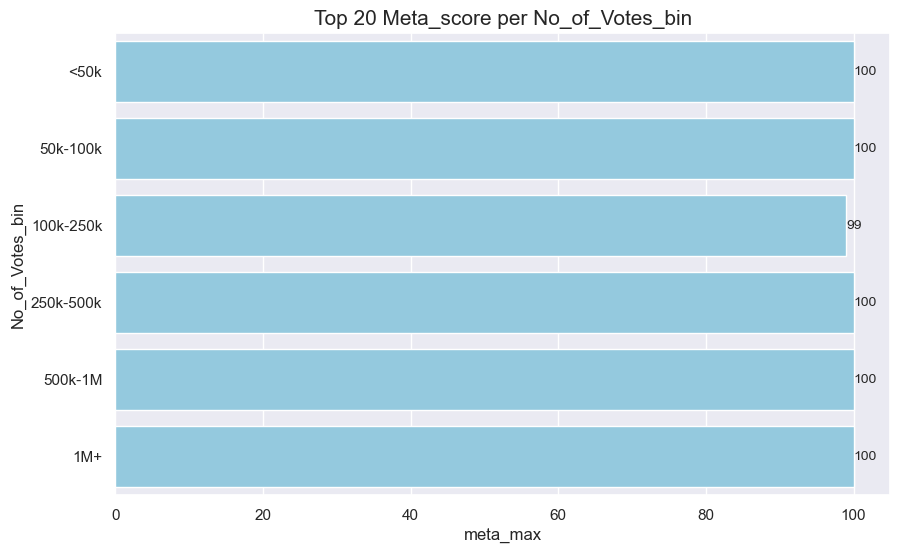

In [104]:
plot_graphs_biv(DF = df_n_votes_stats, X_COLUMN = 'meta_max', Y_COLUMN = 'No_of_Votes_bin', N = 20, 
                TITLE = 'Top 20 Meta_score per No_of_Votes_bin')

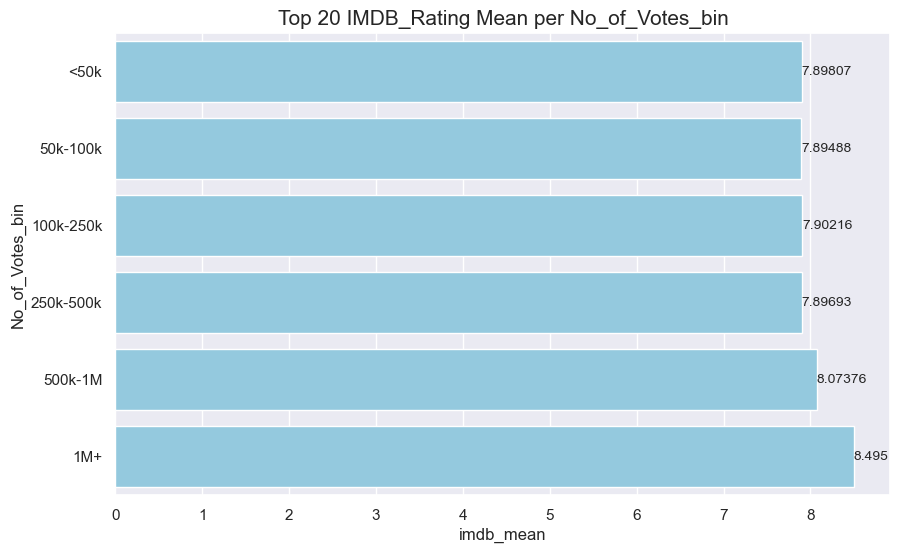

In [105]:
plot_graphs_biv(DF = df_n_votes_stats, X_COLUMN = 'imdb_mean', Y_COLUMN = 'No_of_Votes_bin', N = 20, 
                TITLE = 'Top 20 IMDB_Rating Mean per No_of_Votes_bin')

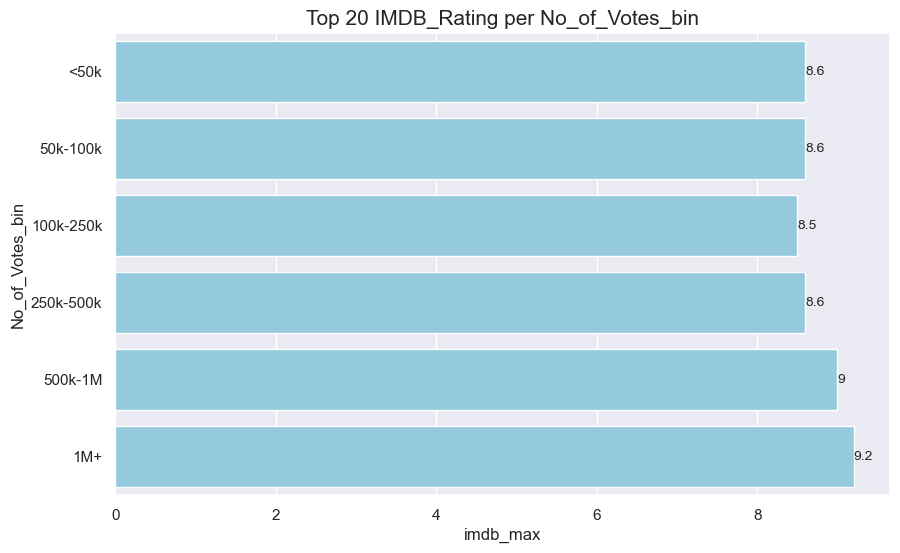

In [106]:
plot_graphs_biv(DF = df_n_votes_stats, X_COLUMN = 'imdb_max', Y_COLUMN = 'No_of_Votes_bin', N = 20, 
                TITLE = 'Top 20 IMDB_Rating per No_of_Votes_bin')

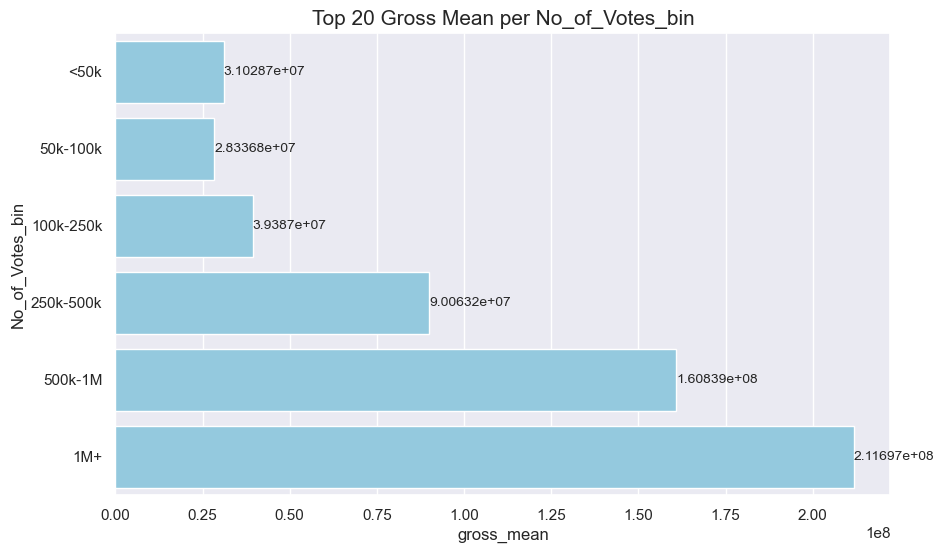

In [107]:
plot_graphs_biv(DF = df_n_votes_stats, X_COLUMN = 'gross_mean', Y_COLUMN = 'No_of_Votes_bin', N = 20, 
                TITLE = 'Top 20 Gross Mean per No_of_Votes_bin')

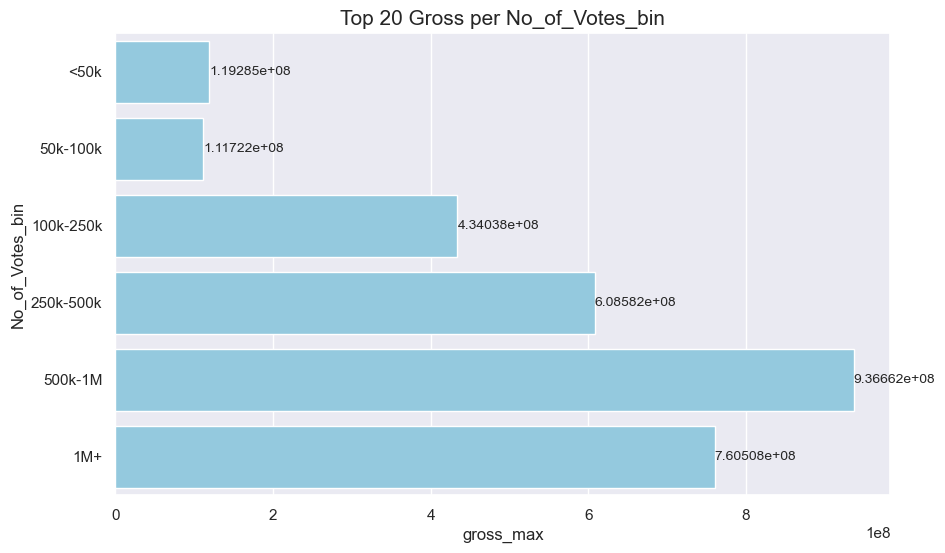

In [108]:
plot_graphs_biv(DF = df_n_votes_stats, X_COLUMN = 'gross_max', Y_COLUMN = 'No_of_Votes_bin', N = 20, 
                TITLE = 'Top 20 Gross per No_of_Votes_bin')

Na subseção referente a No_of_Votes, observamos que:
- No Meta_score, os valores médios e máximos não apresentaram variações significativas com o número de votação; 
- No IMDB_Rating, tanto as notas médias quanto máximas se demonstram parecidas em todas as categorias, mas tendo os maiores valores com votações acima de 1M;
- No Gross, na análise da média, quanto maior o número de votos, maior o faturamento. Quanto aos valores máximos,o maior valor foi entre 0.5M e 1M, seguido por valores superiores a 1M.


#### Gênero

In [111]:
# Agrupa Genres com máximos e médias de: Meta_score, IMDB_Rating e Gross

results = []
for genre in genres_list:
    subset = df_eda[df_eda[genre] == 1]
    results.append({"Genre": genre,
                    "meta_mean": subset["Meta_score"].mean(),
                    "meta_max": subset["Meta_score"].max(),
                    "imdb_mean": subset["IMDB_Rating"].mean(),
                    "imdb_max": subset["IMDB_Rating"].max(),
                    "gross_mean": subset["Gross"].mean(), 
                    "gross_max": subset["Gross"].max(),
                    "genre_count": subset["Gross"].count()
                   })

df_generes = pd.DataFrame(results)
df_generes

Genre  meta_mean  meta_max  imdb_mean  imdb_max    gross_mean  \
0      Action  74.502545      98.0   7.948677       9.0  1.284659e+08   
1   Adventure  78.002581     100.0   7.952041       8.9  1.527779e+08   
2   Animation  80.826632      96.0   7.930488       8.6  1.170130e+08   
3   Biography  76.501188     100.0   7.935780       8.9  5.678579e+07   
4      Comedy  77.959702      99.0   7.903433       8.6  6.483863e+07   
5       Crime  75.903181     100.0   7.954545       9.2  4.566240e+07   
6       Drama  78.025133     100.0   7.957538       9.2  4.995265e+07   
7      Family  77.889549      96.0   7.912500       8.6  8.938265e+07   
8     Fantasy  76.541712      98.0   7.931818       8.7  1.024753e+08   
9   Film-Noir  87.092262     100.0   7.989474       8.4  3.148702e+07   
10    History  79.049160      97.0   7.953571       8.9  5.845131e+07   
11     Horror  80.995175      97.0   7.887500       8.5  4.877743e+07   
12      Music  77.080421      98.0   7.914286       8.5  3.492900e+07   
13    Musical  77.932094      99.0   7.947059       8.4  2.864931e+07   
14    Mystery  78.610235     100.0   7.967677       8.6  4.533623e+07   
15    Romance  80.722812     100.0   7.925600       8.8  4.435106e+07   
16     Sci-Fi  76.699188      98.0   7.977612       8.8  1.408672e+08   
17      Sport  73.102013      90.0   7.926316       8.3  5.367202e+07   
18   Thriller  77.061411     100.0   7.909489       8.6  6.053035e+07   
19        War  80.015975     100.0   8.013725       8.6  4.631476e+07   
20    Western  83.100000      98.0   8.000000       8.8  5.643159e+07   

       gross_max  genre_count  
0   9.366622e+08          189  
1   9.366622e+08          196  
2   6.085817e+08           82  
3   2.559595e+08          109  
4   4.340380e+08          233  
5   5.348584e+08          209  
6   8.583730e+08          723  
7   4.351106e+08           56  
8   7.605076e+08           66  
9   6.808257e+07           19  
10  1.986765e+08           56  
11  2.329061e+08           32  
12  2.164280e+08           35  
13  8.050000e+07           17  
14  2.935063e+08           99  
15  6.593254e+08          125  
16  9.366622e+08           67  
17  2.559595e+08           19  
18  3.354513e+08          137  
19  2.165409e+08           51  
20  1.842088e+08           20

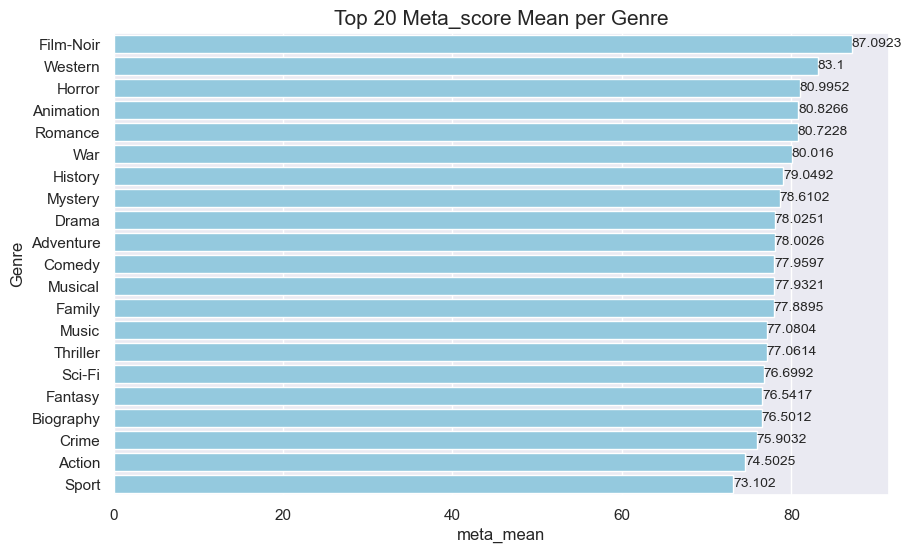

In [112]:
plot_graphs_biv(DF = df_generes, X_COLUMN = 'meta_mean', Y_COLUMN = 'Genre', N = 21, 
                TITLE = 'Top 20 Meta_score Mean per Genre')

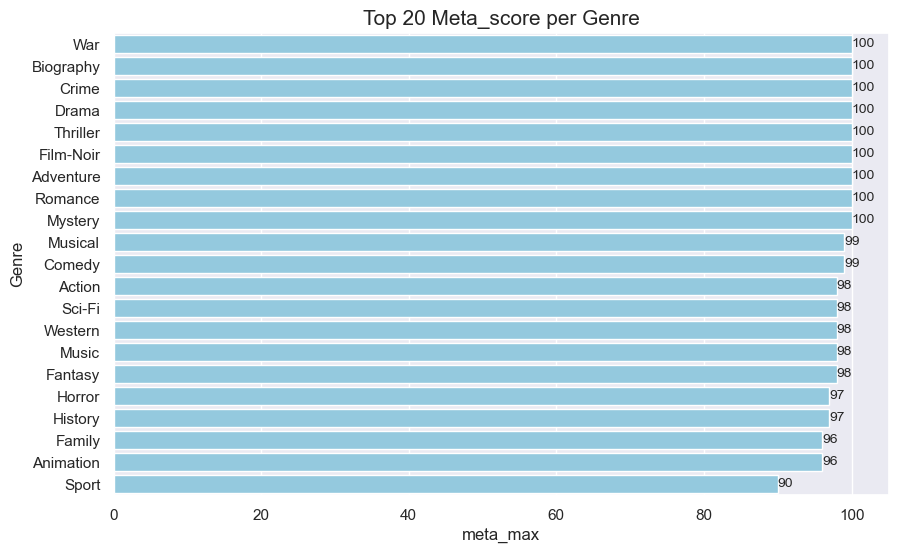

In [113]:
plot_graphs_biv(DF = df_generes, X_COLUMN = 'meta_max', Y_COLUMN = 'Genre', N = 21, 
                TITLE = 'Top 20 Meta_score per Genre')

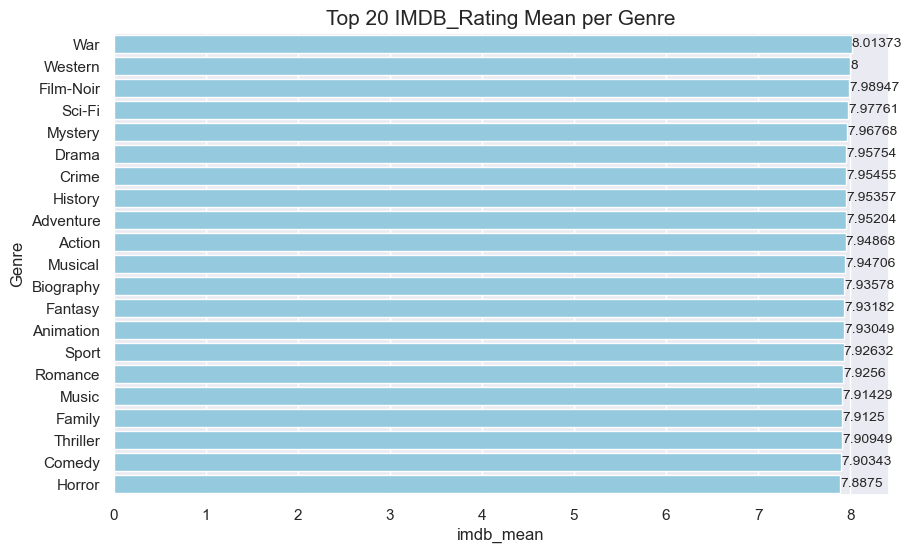

In [114]:
plot_graphs_biv(DF = df_generes, X_COLUMN = 'imdb_mean', Y_COLUMN = 'Genre', N = 21, 
                TITLE = 'Top 20 IMDB_Rating Mean per Genre')

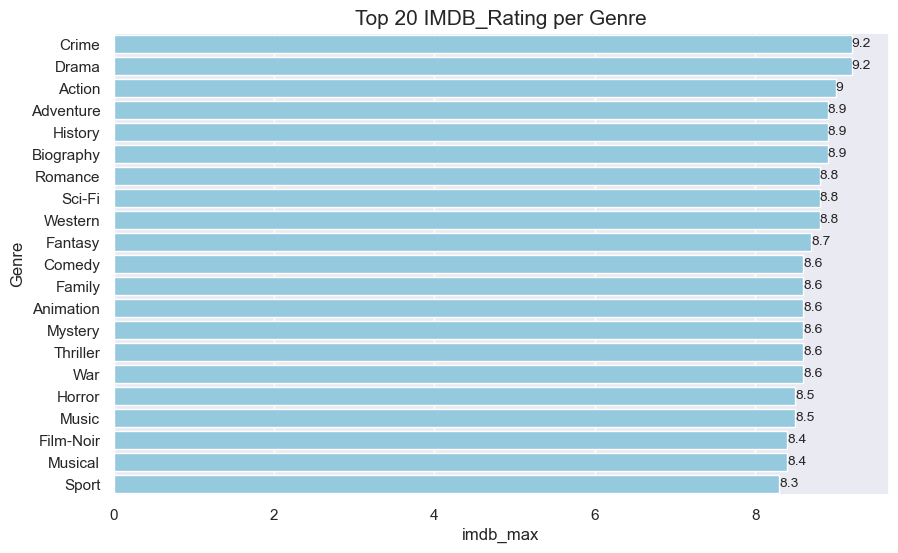

In [115]:
plot_graphs_biv(DF = df_generes, X_COLUMN = 'imdb_max', Y_COLUMN = 'Genre', N = 21, 
                TITLE = 'Top 20 IMDB_Rating per Genre')

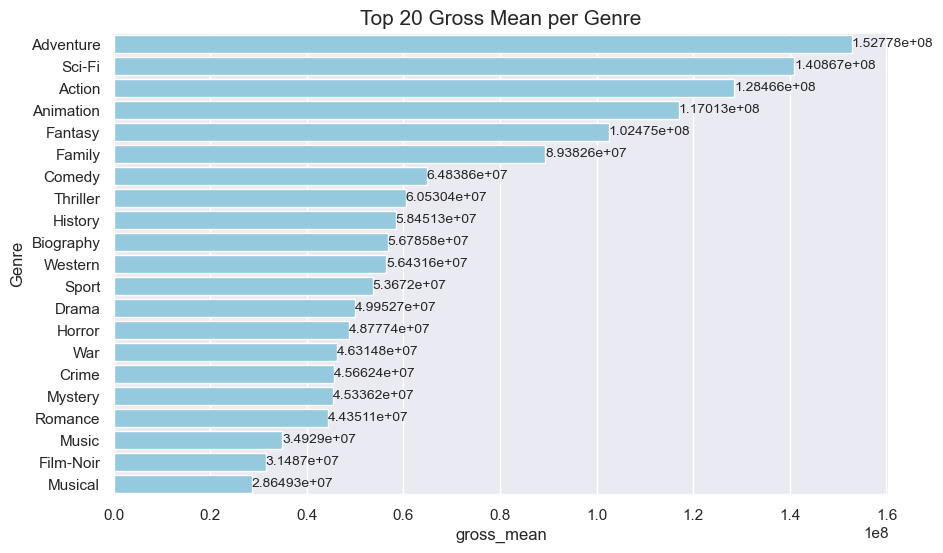

In [116]:
plot_graphs_biv(DF = df_generes, X_COLUMN = 'gross_mean', Y_COLUMN = 'Genre', N = 21, 
                TITLE = 'Top 20 Gross Mean per Genre')

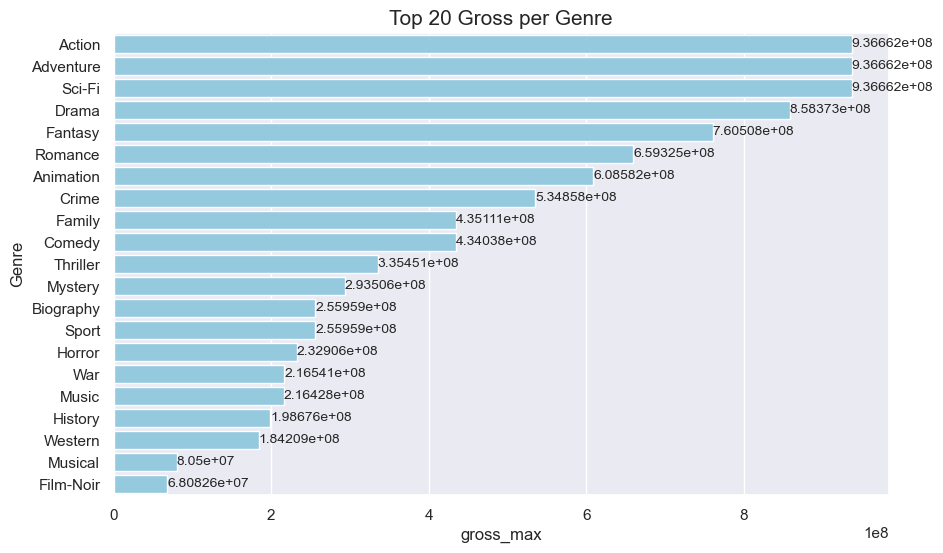

In [117]:
plot_graphs_biv(DF = df_generes, X_COLUMN = 'gross_max', Y_COLUMN = 'Genre', N = 21, 
                TITLE = 'Top 20 Gross per Genre')

Na subseção referente a Genre, observamos que:
- No Meta_score, Film-Noir foi o genero que apresentou a maior média, enquanto 9 gêneros tiveram a nota máxima;
- No IMDB_Rating, as médias de todos os gêneros se demonstraram muito próximas (entre 8 e 7.8), quanto as maiores notas, 9.2, foram dos gêneros Crime e Drama;
- No Gross, tanto o faturamento médio quanto máximo apresentaram grandes discrepâncias entre os gêneros, tendo destaque os gêneros de Action, Adventure e Sci-Fi.

#### Atores

In [120]:
# Agrupa Stars com: Meta_score, IMDB_Rating e Gross
df_stars = pd.melt(df_eda,
                   id_vars=["Series_Title", "Meta_score", "IMDB_Rating", "Gross"],
                   value_vars=["Star1", "Star2", "Star3", "Star4"],
                   var_name="Star_pos",value_name="Actor"
                  ).dropna(subset=["Actor"])

df_stars

Series_Title  Meta_score  IMDB_Rating  \
0                                     The Godfather       100.0          9.2   
1                                   The Dark Knight        84.0          9.0   
2                            The Godfather: Part II        90.0          9.0   
3                                      12 Angry Men        96.0          9.0   
4     The Lord of the Rings: The Return of the King        94.0          8.9   
...                                             ...         ...          ...   
3991                         Breakfast at Tiffany's        76.0          7.6   
3992                                          Giant        84.0          7.6   
3993                          From Here to Eternity        85.0          7.6   
3994                                       Lifeboat        78.0          7.6   
3995                                   The 39 Steps        93.0          7.6   

             Gross Star_pos           Actor  
0     1.349664e+08    Star1   Marlon Brando  
1     5.348584e+08    Star1  Christian Bale  
2     5.730000e+07    Star1       Al Pacino  
3     4.360000e+06    Star1     Henry Fonda  
4     3.778459e+08    Star1     Elijah Wood  
...            ...      ...             ...  
3991  6.808257e+07    Star4     Buddy Ebsen  
3992  6.808257e+07    Star4   Carroll Baker  
3993  3.050000e+07    Star4      Donna Reed  
3994  6.808257e+07    Star4  William Bendix  
3995  6.808257e+07    Star4  Godfrey Tearle  

[3996 rows x 6 columns]

In [121]:
# Agrupa Actor com máximos e médias de: Meta_score, IMDB_Rating e Gross
df_actor = df_stars.groupby(['Actor']).agg(meta_mean = ('Meta_score', 'mean'),
                                              meta_max = ('Meta_score', 'max'),
                                              imdb_mean = ('IMDB_Rating', 'mean'),
                                              imdb_max = ('IMDB_Rating', 'max'),
                                              gross_mean = ('Gross', 'mean'), 
                                              gross_max = ('Gross', 'max'),
                                              actor_count = ('Gross', 'count'),
                                              ).reset_index()
df_actor

Actor  meta_mean   meta_max  imdb_mean  imdb_max  \
0             Aamir Bashir  77.969121  77.969121     8.1000       8.1   
1               Aamir Khan  77.351841  84.000000     8.2375       8.4   
2            Aaron Eckhart  84.000000  84.000000     9.0000       9.0   
3     Aaron Taylor-Johnson  66.000000  66.000000     7.6000       7.6   
4        Abdel Ahmed Ghili  77.969121  77.969121     8.1000       8.1   
...                    ...        ...        ...        ...       ...   
2702        Çetin Tekindor  77.969121  77.969121     8.3500       8.4   
2703          Émile Vallée  81.000000  81.000000     7.9000       7.9   
2704         Éric Toledano  57.000000  57.000000     8.5000       8.5   
2705      Ömer Faruk Sorak  77.969121  77.969121     8.0000       8.0   
2706           Özge Özberk  77.969121  77.969121     8.0000       8.0   

        gross_mean     gross_max  actor_count  
0     6.808257e+07  6.808257e+07            1  
1     1.267684e+07  6.808257e+07            8  
2     5.348584e+08  5.348584e+08            1  
3     4.807130e+07  4.807130e+07            1  
4     3.098110e+05  3.098110e+05            1  
...            ...           ...          ...  
2702  6.808257e+07  6.808257e+07            2  
2703  6.808257e+07  6.808257e+07            1  
2704  1.318228e+07  1.318228e+07            1  
2705  6.808257e+07  6.808257e+07            1  
2706  6.808257e+07  6.808257e+07            1  

[2707 rows x 8 columns]

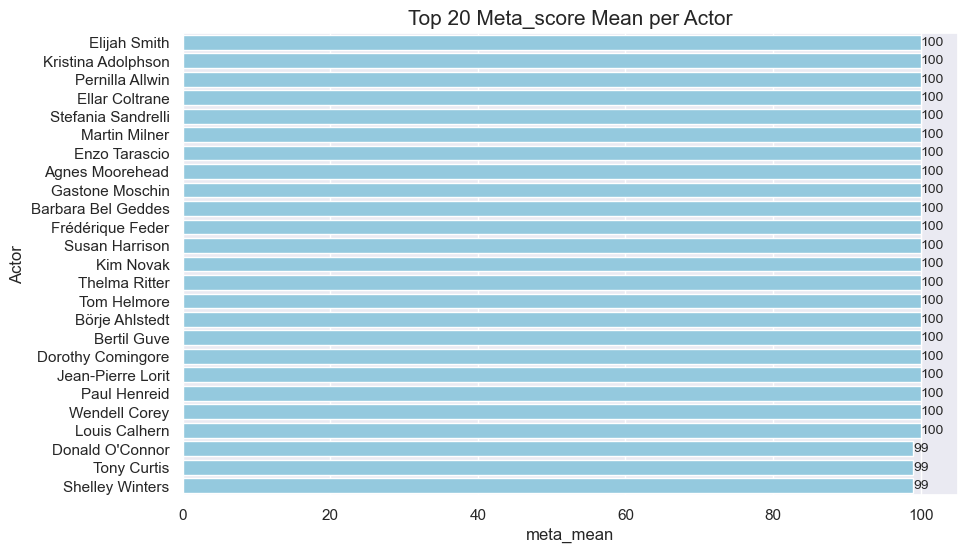

In [122]:
plot_graphs_biv(DF = df_actor, X_COLUMN = 'meta_mean', Y_COLUMN = 'Actor', N = 25, 
                TITLE = 'Top 20 Meta_score Mean per Actor')

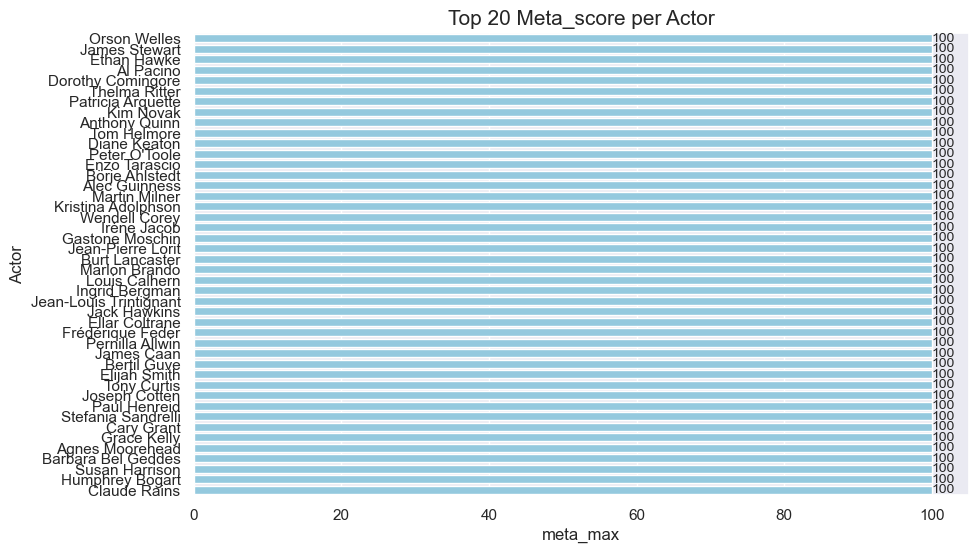

In [123]:
plot_graphs_biv(DF = df_actor, X_COLUMN = 'meta_max', Y_COLUMN = 'Actor', N = 44, 
                TITLE = 'Top 20 Meta_score per Actor')

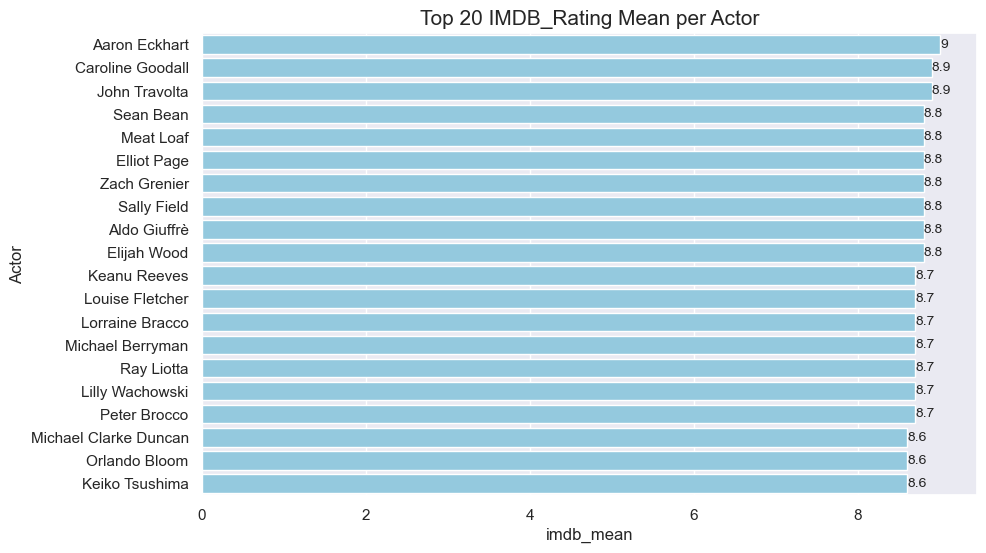

In [124]:
plot_graphs_biv(DF = df_actor, X_COLUMN = 'imdb_mean', Y_COLUMN = 'Actor', N = 20, 
                TITLE = 'Top 20 IMDB_Rating Mean per Actor')

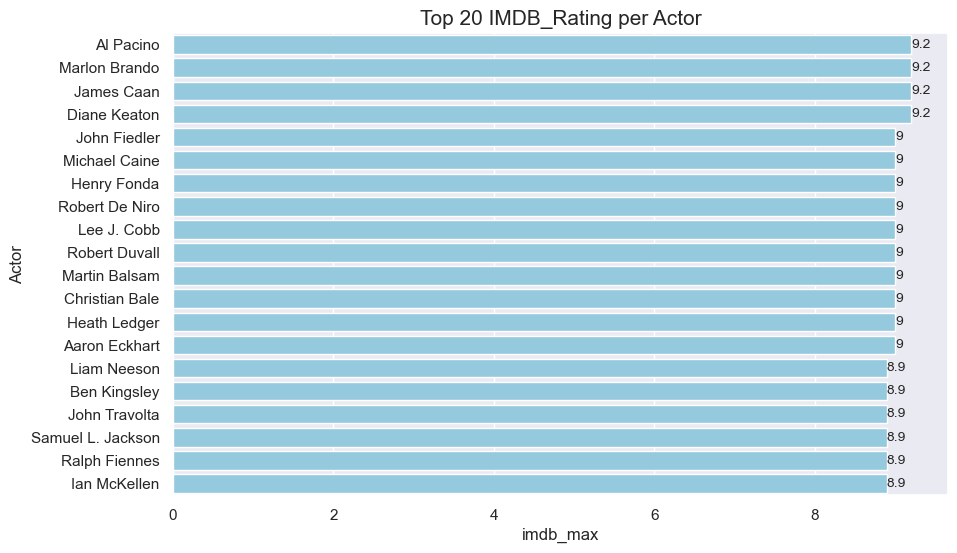

In [125]:
plot_graphs_biv(DF = df_actor, X_COLUMN = 'imdb_max', Y_COLUMN = 'Actor', N = 20, 
                TITLE = 'Top 20 IMDB_Rating per Actor')

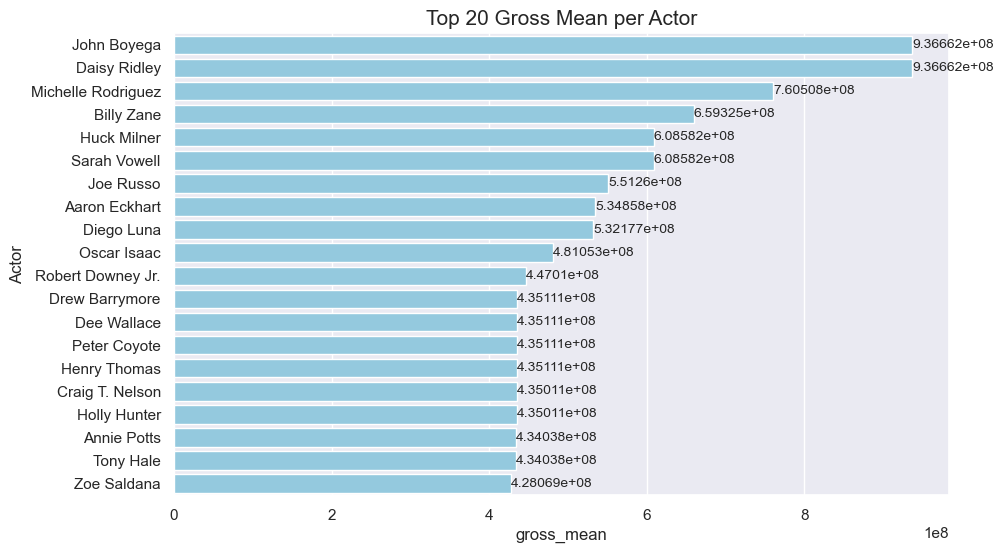

In [126]:
plot_graphs_biv(DF = df_actor, X_COLUMN = 'gross_mean', Y_COLUMN = 'Actor', N = 20, 
                TITLE = 'Top 20 Gross Mean per Actor')

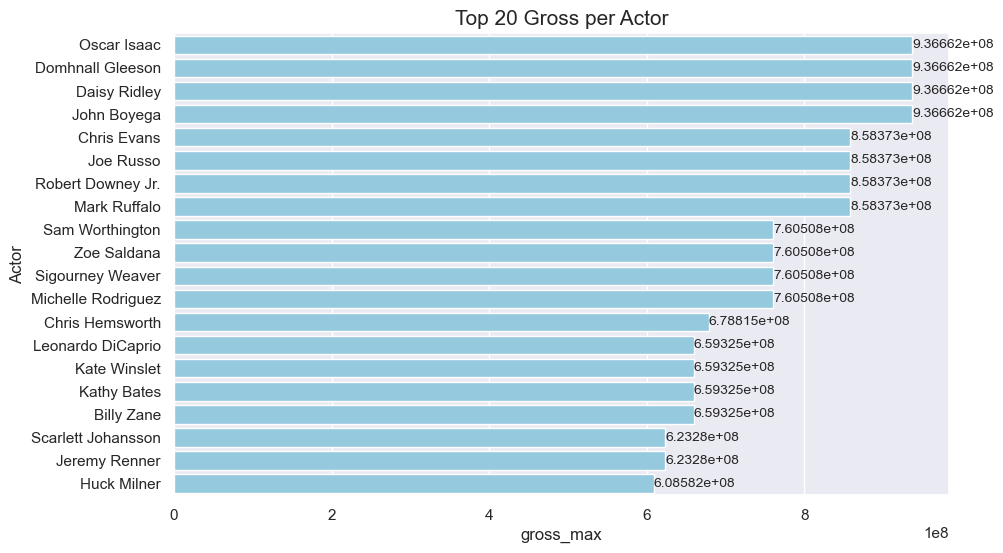

In [127]:
plot_graphs_biv(DF = df_actor, X_COLUMN = 'gross_max', Y_COLUMN = 'Actor', N = 20, 
                TITLE = 'Top 20 Gross per Actor')

Na subseção referente a Actor, observamos que:
- No Meta_score, 22 atores tiveram a média com nota máxima e 44 atores receberam nota máxima;
- No IMDB_Rating, o ator com melhor média é Aaron Eckhart, e os atores com amiores notas são Al Pacino, Marlon Brando, James Caan e Diane Keaton;
- No Gross, os atores com maiores médias de faturamento são John Boyega e Daisy Ridley, e os atores com maior faturamento máximo são Oscar Isaac, Domhnall Geeson, Daisy Ridley e John Boyega.

#### Título

In [130]:
df_title = df_eda[['Series_Title','IMDB_Rating','Meta_score','Gross']]
df_title

Series_Title  IMDB_Rating  Meta_score  \
0                                    The Godfather          9.2       100.0   
1                                  The Dark Knight          9.0        84.0   
2                           The Godfather: Part II          9.0        90.0   
3                                     12 Angry Men          9.0        96.0   
4    The Lord of the Rings: The Return of the King          8.9        94.0   
..                                             ...          ...         ...   
994                         Breakfast at Tiffany's          7.6        76.0   
995                                          Giant          7.6        84.0   
996                          From Here to Eternity          7.6        85.0   
997                                       Lifeboat          7.6        78.0   
998                                   The 39 Steps          7.6        93.0   

            Gross  
0    1.349664e+08  
1    5.348584e+08  
2    5.730000e+07  
3    4.360000e+06  
4    3.778459e+08  
..            ...  
994  6.808257e+07  
995  6.808257e+07  
996  3.050000e+07  
997  6.808257e+07  
998  6.808257e+07  

[999 rows x 4 columns]

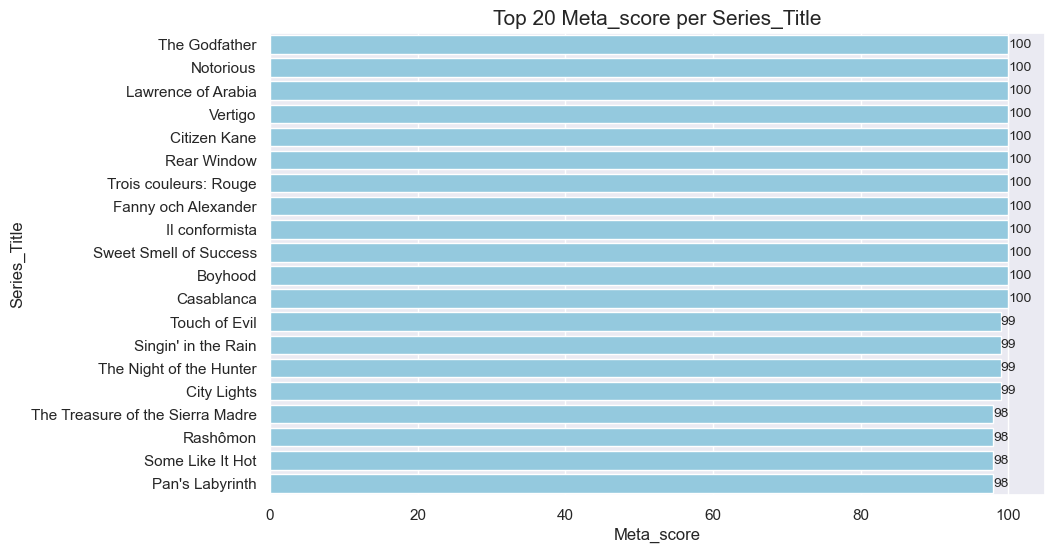

In [131]:
plot_graphs_biv(DF = df_title, X_COLUMN = 'Meta_score', Y_COLUMN = 'Series_Title', N = 20, 
                TITLE = 'Top 20 Meta_score per Series_Title')

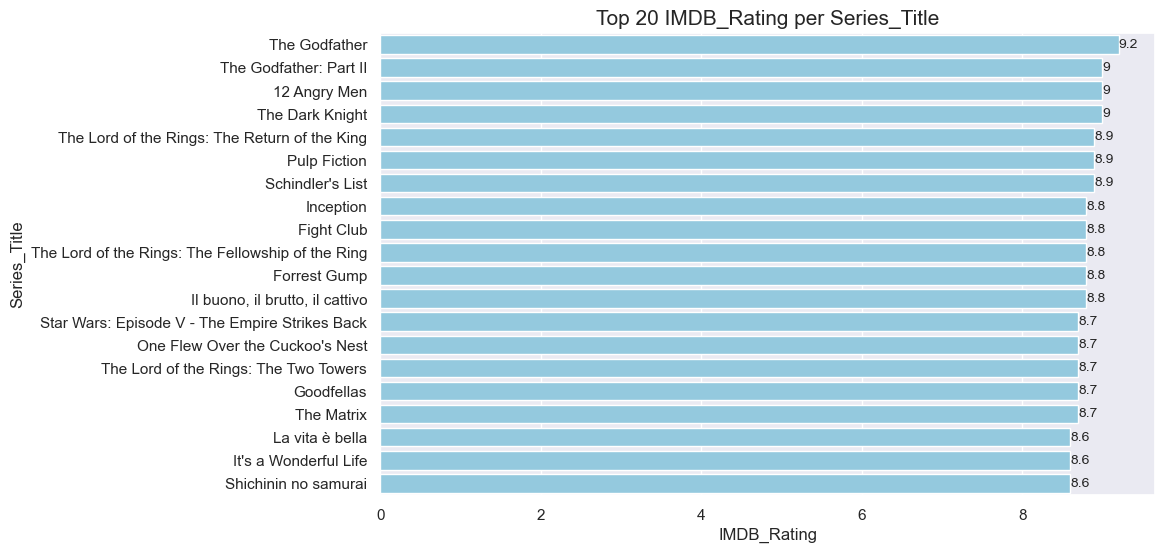

In [132]:
plot_graphs_biv(DF = df_title, X_COLUMN = 'IMDB_Rating', Y_COLUMN = 'Series_Title', N = 20, 
                TITLE = 'Top 20 IMDB_Rating per Series_Title')

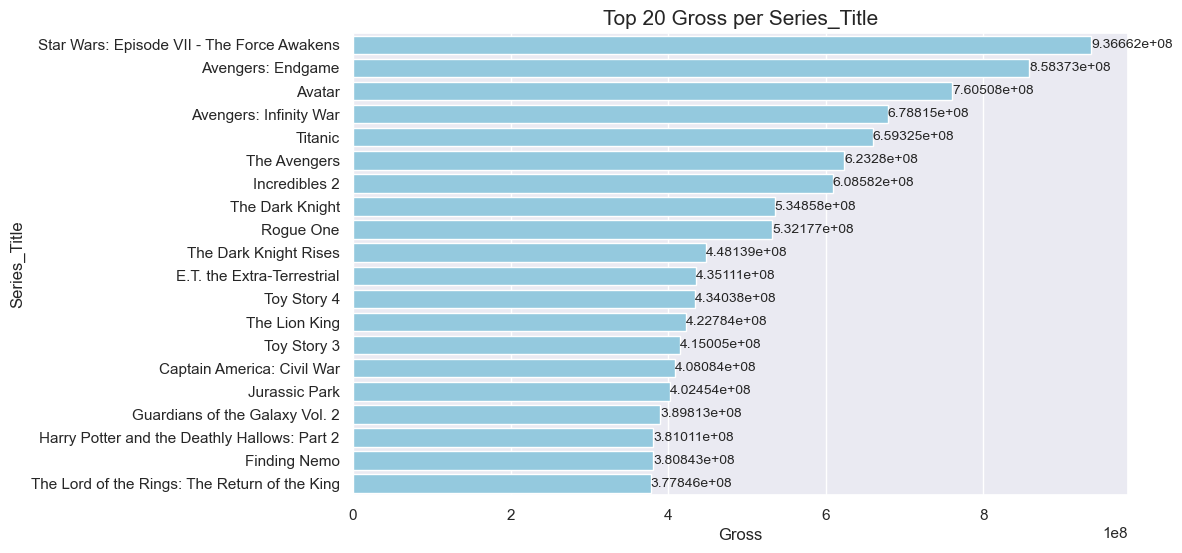

In [133]:
plot_graphs_biv(DF = df_title, X_COLUMN = 'Gross', Y_COLUMN = 'Series_Title', N = 20, 
                TITLE = 'Top 20 Gross per Series_Title')

Na subseção referente a Series_Title, observamos que:
- No Meta_score, 12 filmes alcançaram a pontuação máxima
- No IMDB_Rating, o filme The Godfather obteve a maior nota (9.2), seguido de The Godfather: Part II, 12 Angry Men e The Dark Knight com nota 9;
- No Gross, o filme com maior faturamento foi Star Wars: Episode VII - The Force Awakens

## Correlações

In [136]:
corr_features= numerical_list + genres_list
corr_features

['Released_Year',
 'Runtime',
 'IMDB_Rating',
 'Meta_score',
 'No_of_Votes',
 'Gross',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [137]:
df_corr = df_eda[corr_features].corr()
df_corr

Released_Year   Runtime  IMDB_Rating  Meta_score  No_of_Votes  \
Released_Year       1.000000  0.165831    -0.133355   -0.289296     0.246000   
Runtime             0.165831  1.000000     0.242751   -0.027926     0.172483   
IMDB_Rating        -0.133355  0.242751     1.000000    0.256122     0.479308   
Meta_score         -0.289296 -0.027926     0.256122    1.000000    -0.019238   
No_of_Votes         0.246000  0.172483     0.479308   -0.019238     1.000000   
Gross               0.192930  0.124919     0.092968   -0.030809     0.563484   
Action              0.134867  0.066264     0.001294   -0.147380     0.199619   
Adventure           0.081429  0.046228     0.007430    0.001455     0.236174   
Animation           0.141280 -0.247924    -0.019185    0.075207    -0.003346   
Biography           0.110611  0.159458    -0.015647   -0.045214    -0.021519   
Comedy             -0.004355 -0.220561    -0.090209   -0.000457    -0.079363   
Crime               0.015366  0.010407     0.012469   -0.093525     0.015556   
Drama               0.067029  0.219470     0.057033    0.007979    -0.170552   
Family             -0.027139 -0.075735    -0.031741   -0.001707    -0.036581   
Fantasy             0.000796 -0.076694    -0.015763   -0.033414     0.062585   
Film-Noir          -0.254969 -0.109733     0.021246    0.111804    -0.083103   
History            -0.028447  0.179439     0.005035    0.023165    -0.057883   
Horror             -0.169424 -0.131943    -0.040405    0.048449    -0.030490   
Music               0.044506 -0.014443    -0.023568   -0.014904    -0.078617   
Musical            -0.067377  0.081614    -0.000430   -0.000429    -0.078762   
Mystery            -0.049579 -0.020434     0.024043    0.018715     0.022585   
Romance            -0.062012 -0.039638    -0.031054    0.091657    -0.083368   
Sci-Fi              0.010892 -0.019721     0.029224   -0.029968     0.237918   
Sport               0.062898  0.048383    -0.011068   -0.059646    -0.006513   
Thriller           -0.004361 -0.045839    -0.056337   -0.031850     0.035335   
War                -0.119750  0.075704     0.056059    0.041785    -0.055953   
Western            -0.133617  0.059682     0.027337    0.064545    -0.018780   

                  Gross    Action  Adventure  Animation  Biography  ...  \
Released_Year  0.192930  0.134867   0.081429   0.141280   0.110611  ...   
Runtime        0.124919  0.066264   0.046228  -0.247924   0.159458  ...   
IMDB_Rating    0.092968  0.001294   0.007430  -0.019185  -0.015647  ...   
Meta_score    -0.030809 -0.147380   0.001455   0.075207  -0.045214  ...   
No_of_Votes    0.563484  0.199619   0.236174  -0.003346  -0.021519  ...   
Gross          1.000000  0.291594   0.418314   0.146276  -0.039523  ...   
Action         0.291594  1.000000   0.295528   0.013841  -0.078874  ...   
Adventure      0.418314  0.295528   1.000000   0.329782  -0.108219  ...   
Animation      0.146276  0.013841   0.329782   1.000000  -0.069560  ...   
Biography     -0.039523 -0.078874  -0.108219  -0.069560   1.000000  ...   
Comedy        -0.017886 -0.127407   0.049391   0.076532  -0.139866  ...   
Crime         -0.115285  0.097140  -0.229326  -0.100014  -0.014238  ...   
Drama         -0.293348 -0.341705  -0.433211  -0.304570   0.173143  ...   
Family         0.051891 -0.106603   0.098764   0.212490  -0.029452  ...   
Fantasy        0.091447 -0.025584   0.112143   0.096640  -0.093079  ...   
Film-Noir     -0.050941 -0.067259  -0.050337  -0.041638  -0.048728  ...   
History       -0.023464 -0.073271  -0.054647  -0.072872   0.305528  ...   
Horror        -0.035108 -0.073357  -0.061244  -0.054398  -0.063662  ...   
Music         -0.063154 -0.092042  -0.094138  -0.056979   0.055549  ...   
Musical       -0.051869 -0.063556  -0.045514  -0.039345  -0.046045  ...   
Mystery       -0.075419 -0.066118  -0.146985  -0.086974  -0.116069  ...   
Romance       -0.089722 -0.159505  -0.163984  -0.102067  -0.122644  ...   
Sci-Fi         0.195093  0.166795   0.169848  -0.

In [138]:
df_corr[['Gross']].sort_values(by=['Gross'], ascending = False)

Gross
Gross          1.000000
No_of_Votes    0.563484
Adventure      0.418314
Action         0.291594
Sci-Fi         0.195093
Released_Year  0.192930
Animation      0.146276
Runtime        0.124919
IMDB_Rating    0.092968
Fantasy        0.091447
Family         0.051891
Western       -0.016648
Comedy        -0.017886
Sport         -0.020059
History       -0.023464
Thriller      -0.030099
Meta_score    -0.030809
Horror        -0.035108
Biography     -0.039523
War           -0.050474
Film-Noir     -0.050941
Musical       -0.051869
Music         -0.063154
Mystery       -0.075419
Romance       -0.089722
Crime         -0.115285
Drama         -0.293348

In [139]:
df_corr[['IMDB_Rating']].sort_values(by=['IMDB_Rating'], ascending = False)

IMDB_Rating
IMDB_Rating       1.000000
No_of_Votes       0.479308
Meta_score        0.256122
Runtime           0.242751
Gross             0.092968
Drama             0.057033
War               0.056059
Sci-Fi            0.029224
Western           0.027337
Mystery           0.024043
Film-Noir         0.021246
Crime             0.012469
Adventure         0.007430
History           0.005035
Action            0.001294
Musical          -0.000430
Sport            -0.011068
Biography        -0.015647
Fantasy          -0.015763
Animation        -0.019185
Music            -0.023568
Romance          -0.031054
Family           -0.031741
Horror           -0.040405
Thriller         -0.056337
Comedy           -0.090209
Released_Year    -0.133355

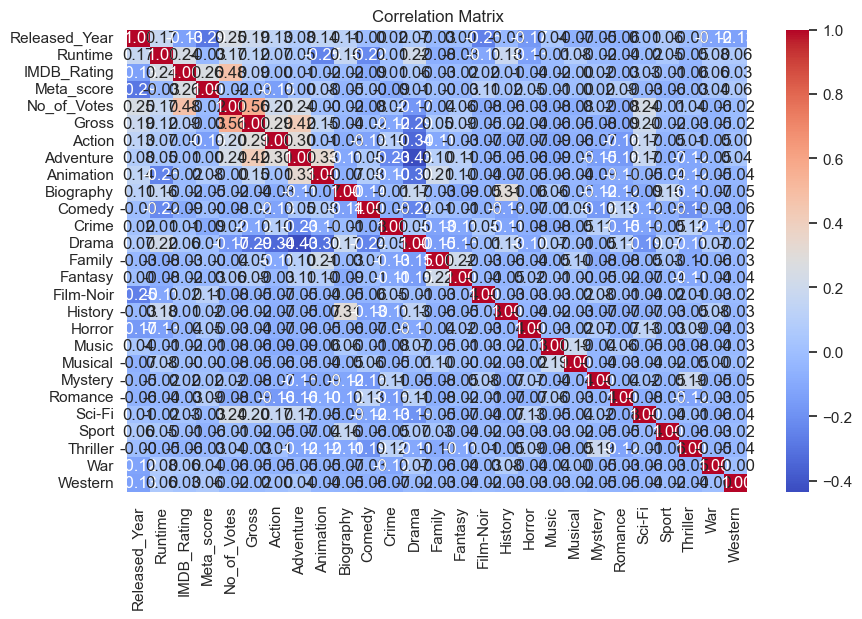

In [140]:
sns.heatmap(df_corr, annot = True, cmap = "coolwarm", fmt = ".2f")


plt.title("Correlation Matrix")
plt.show()

### Correlações sem Genero do filme

In [142]:
corr_features_wo_genre = numerical_list
corr_features_wo_genre

['Released_Year',
 'Runtime',
 'IMDB_Rating',
 'Meta_score',
 'No_of_Votes',
 'Gross']

In [143]:
df_corr_wo_genre = df_eda[corr_features_wo_genre].corr()
df_corr_wo_genre

Released_Year   Runtime  IMDB_Rating  Meta_score  No_of_Votes  \
Released_Year       1.000000  0.165831    -0.133355   -0.289296     0.246000   
Runtime             0.165831  1.000000     0.242751   -0.027926     0.172483   
IMDB_Rating        -0.133355  0.242751     1.000000    0.256122     0.479308   
Meta_score         -0.289296 -0.027926     0.256122    1.000000    -0.019238   
No_of_Votes         0.246000  0.172483     0.479308   -0.019238     1.000000   
Gross               0.192930  0.124919     0.092968   -0.030809     0.563484   

                  Gross  
Released_Year  0.192930  
Runtime        0.124919  
IMDB_Rating    0.092968  
Meta_score    -0.030809  
No_of_Votes    0.563484  
Gross          1.000000

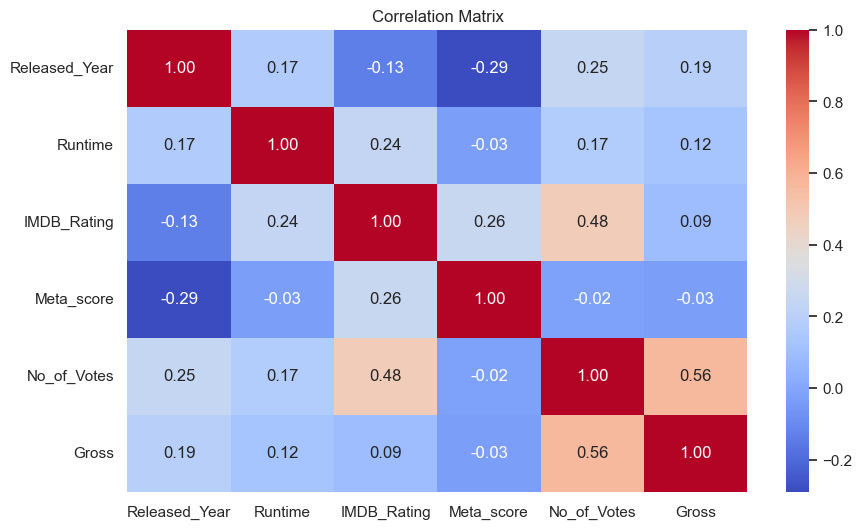

In [144]:
sns.heatmap(df_corr_wo_genre, annot = True, cmap = "coolwarm", fmt = ".2f")


plt.title("Correlation Matrix")
plt.show()

# Entrega 2

### a.	Qual filme você recomendaria para uma pessoa que você não conhece?

Recomendaria The Godfather, por ser o filme com maior nota no IMDB, assim como pontuação máxima no Meta Score.

### b.	Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 

A partir das análises anteriormente vistas, uma forma mais confiável de ver isso é por meio das correlações.

Caso desconsideremos os gêneros, os dois maiores fatores são Número de votantes (No_of_Votes) e o ano de lançamento (Released_Year).

Caso consideremos os gêneros, Número de votantes (No_of_Votes), os gêneros de aventura, ação e ficção científica (Adventure, Action e Sci-Fi), seguido de o ano de lançamento (Released_Year).

### c.	Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

Algumas informações referentes aos atributos que possuímos na tabela e podem ser extraídas da coluna Overview são, possívelmente o Gênero (Genre) do filme e estimar sua Classificação indicativa (Certificate). Um exemplo abaixo foi extraído utilizando o wordcloud, onde se dá maior destaque a palavras que mais se repetiram. Foram demonstrados os generos de Horror, Action, Adventure e Sci-Fi.

In [152]:
from wordcloud import WordCloud

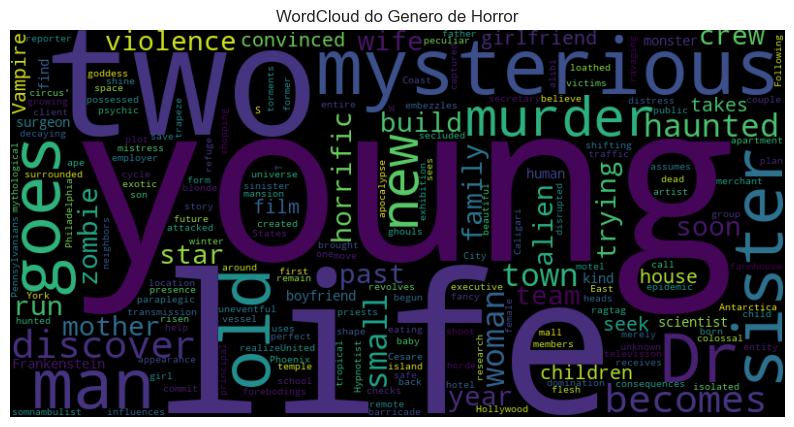

In [153]:
text = " ".join(str(i) for i in df_eda[df_eda['Horror'] == 1].Overview)
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud do Genero de Horror")
plt.show()

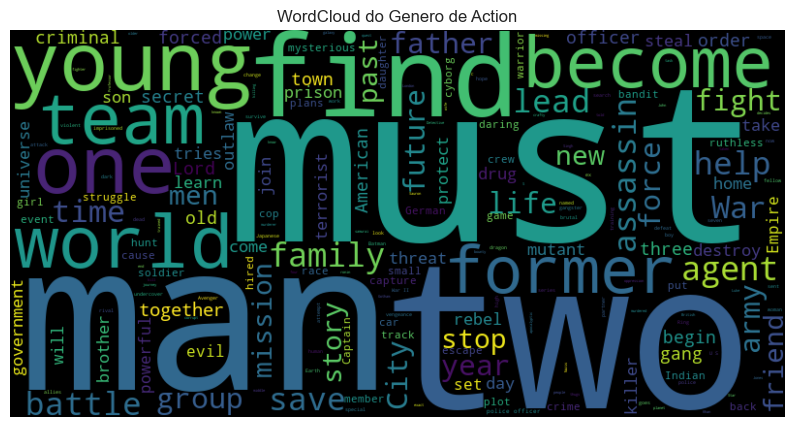

In [154]:
text = " ".join(str(i) for i in df_eda[df_eda['Action'] == 1].Overview)
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud do Genero de Action")
plt.show()

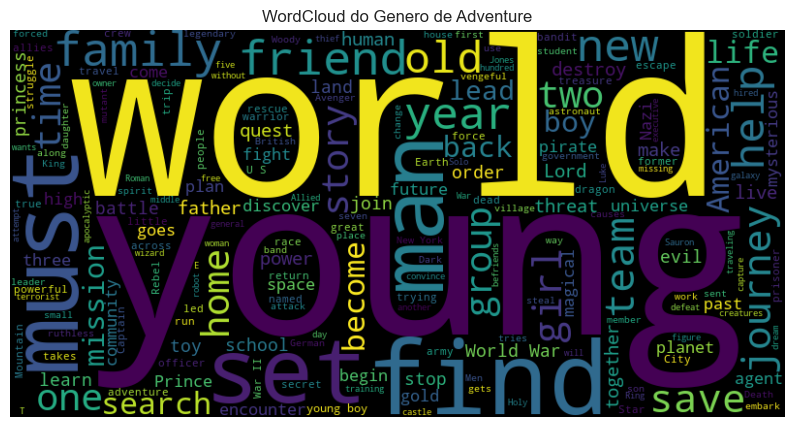

In [155]:
text = " ".join(str(i) for i in df_eda[df_eda['Adventure'] == 1].Overview)
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud do Genero de Adventure")
plt.show()

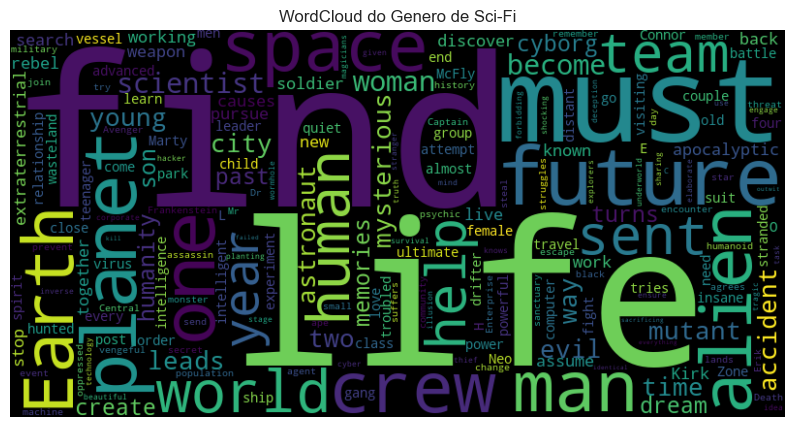

In [156]:
text = " ".join(str(i) for i in df_eda[df_eda['Sci-Fi'] == 1].Overview)
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud do Genero de Sci-Fi")
plt.show()